<a href="https://colab.research.google.com/github/asifakhan09/AR-MA-ARMA-model/blob/main/Moving%20Average%20and%20ARMA%20Speech%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer exercise 2 (Ladok-Lab 2a)

In this computer exercise you will study the connections between
pole-zero plots, covariance functions, spectral densities and
realizations for some AR-, MA- and ARMA-processes and you will also
learn how to simulate data from a specific model. You will study
recorded speech data and reconstruct the data sequence from white noise and an estimated AR-model.


In [1]:
# Start with the necessary imports
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal
import scipy.io as sio
from scipy.fft import fft, ifft
!pip install sounddevice as sd

# my_module/help_funcs_SSP.py
from help_funcs_SSP import poles_and_zeros, plot_poles_and_zeros, arcov, completeAR


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


## 1 Working with AR-, MA- and ARMA-models

To use the powerful toolbox of AR-, MA- and ARMA-models, it is important to understand how these models are designed and the properties that are connected to a specific model. The design of a specific model for a certain problem is built on your knowledge of advantages and drawbacks of the model.

### 1.1 Modelling and simulation of AR(1)-processes

Create an AR(1)-model in Python, representing `C=np.array([1])` and `A=np.array([1,a1])` for
your choice of the real-valued parameter `a1` with the stability
restriction `|a1|<1`. In this exercise you will write code for your own
script to generate a set of figures of the pole-zero plot, covariance
function, spectral density and a realization example of a specific
model. Use the `plt.subplot`-command to collect all representations in the
same figure. With the function `poles_and_zeros(C,A)` poles and zeros are found and plotted. Change the value of `a1` to another
value with opposite sign and study the pole location.

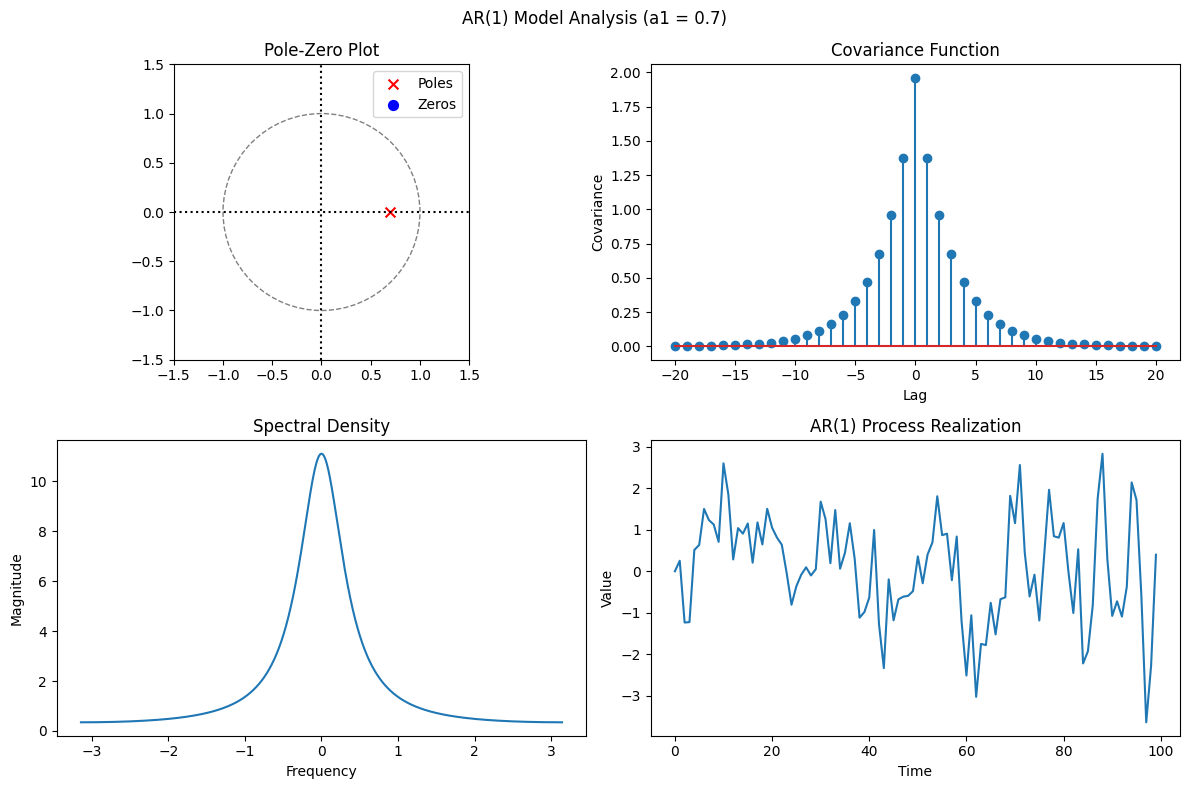

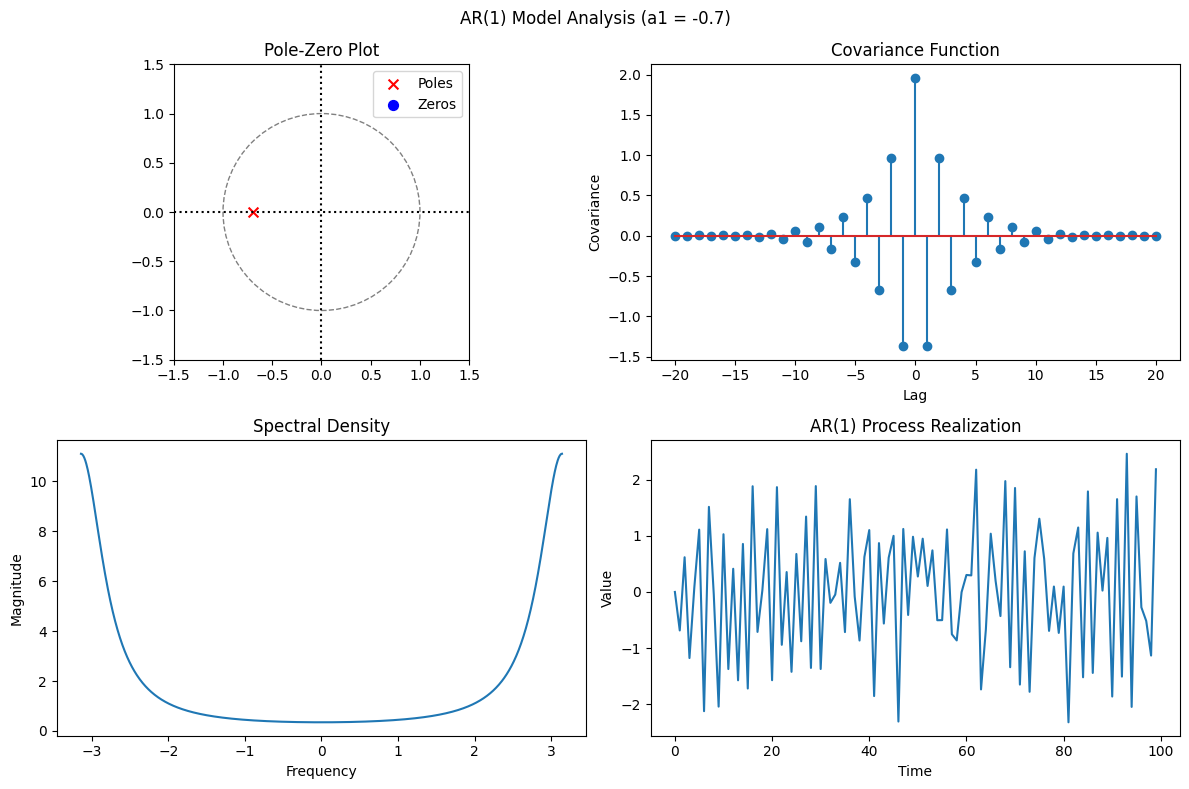

In [ ]:
def poles_and_zeros(C, A):
    zeros = np.roots(C)
    poles = np.roots(A)
    return poles, zeros

def plot_poles_and_zeros(ax, poles, zeros):
    ax.scatter(np.real(poles), np.imag(poles), marker='x', color='red', s=50, label='Poles')
    ax.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', s=50, label='Zeros')
    ax.add_artist(plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--'))
    ax.axhline(y=0, color='k', linestyle=':')
    ax.axvline(x=0, color='k', linestyle=':')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.set_title('Pole-Zero Plot')
    ax.legend()

def covariance_function(a1, lags):
    return np.power(a1, np.abs(lags)) / (1 - a1**2)

def spectral_density(a1, frequencies):
    return 1 / (1 + a1**2 - 2*a1*np.cos(frequencies))

def generate_ar1_process(a1, n_samples):
    white_noise = np.random.normal(0, 1, n_samples)
    ar1_process = np.zeros(n_samples)
    for t in range(1, n_samples):
        ar1_process[t] = a1 * ar1_process[t-1] + white_noise[t]
    return ar1_process

def plot_ar1_analysis(a1):
    C = np.array([1])
    A = np.array([1, -a1])  # Note: AR coefficients are negated in scipy's convention

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f'AR(1) Model Analysis (a1 = {a1})')

    # Pole-Zero Plot
    poles, zeros = poles_and_zeros(C, A)
    plot_poles_and_zeros(axs[0, 0], poles, zeros)

    # Covariance Function
    lags = np.arange(-20, 21)
    cov = covariance_function(a1, lags)
    axs[0, 1].stem(lags, cov)
    axs[0, 1].set_title('Covariance Function')
    axs[0, 1].set_xlabel('Lag')
    axs[0, 1].set_ylabel('Covariance')

    # Spectral Density
    freq = np.linspace(-np.pi, np.pi, 1000)
    sd = spectral_density(a1, freq)
    axs[1, 0].plot(freq, sd)
    axs[1, 0].set_title('Spectral Density')
    axs[1, 0].set_xlabel('Frequency')
    axs[1, 0].set_ylabel('Magnitude')

    # Realization Example
    n_samples = 100
    ar1_process = generate_ar1_process(a1, n_samples)
    axs[1, 1].plot(range(n_samples), ar1_process)
    axs[1, 1].set_title('AR(1) Process Realization')
    axs[1, 1].set_xlabel('Time')
    axs[1, 1].set_ylabel('Value')

    plt.tight_layout()
    plt.show()

# Example usage
a1_positive = 0.7
plot_ar1_analysis(a1_positive)

# Change a1 to a negative value
a1_negative = -0.7
plot_ar1_analysis(a1_negative)


***Q1. Does the resulting locations of the pole match your choices of
**`a1`** according to theory (see Ex. 7.1, page 170 in the course
book)?***


Yes, The location of the pole at -0.7 matches the choice of a1 = -0.7.

With a choice of the input white noise standard deviation $\sigma$, the
corresponding spectral density can be calculated. The spectral density can then be visualized in the frequency range zero to 0.5.
The function `scipy.signal.freqz()` calculates the frequency function corresponding to the given polynomials `sigma*C` and `A` for angular frequencies
$0\leq \omega < 2\pi$. We choose to divide the angular frequency scale with $2\pi$ and plot the spectral density as a function of frequencies
$0\leq f \leq 0.5$.

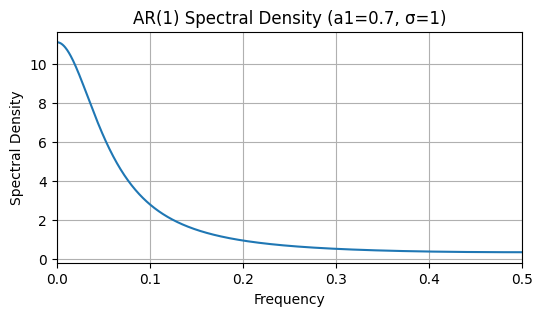

In [ ]:
#visualizing spectral desnsity in terms of frequency


from scipy import signal # add import statement here
def plot_ar1_spectral_density(a1, sigma, num_points=1000):
    # Create the AR(1) model coefficients
    C = np.array([1])  # MA part (always 1 for AR(1))
    A = np.array([1, -a1])  # AR part

    # Calculate the frequency response
    w, h = signal.freqz(sigma * C, A, worN=num_points)

    # Convert angular frequency to regular frequency
    f = w / (2 * np.pi)

    # Calculate the spectral density
    R = np.abs(h)**2

    # Plot the spectral density
    plt.figure(figsize=(6, 3))
    plt.plot(f, R)
    plt.xlim(0, 0.5)
    plt.xlabel('Frequency')
    plt.ylabel('Spectral Density')
    plt.title(f'AR(1) Spectral Density (a1={a1}, σ={sigma})')
    plt.grid(True)
    plt.show()

# Example usage
a1 = 0.7  # AR coefficient
sigma = 1  # Standard deviation of white noise input

plot_ar1_spectral_density(a1, sigma)



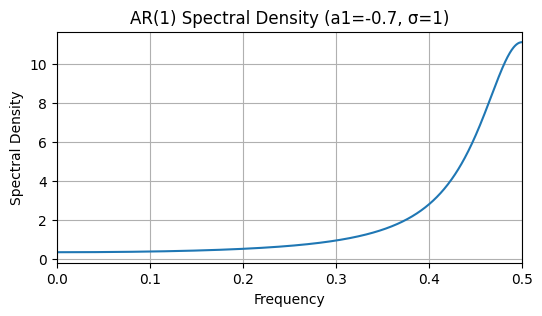

In [ ]:
a1 = -0.7  # AR coefficient
sigma = 1  # Standard deviation of white noise input
plot_ar1_spectral_density(a1, sigma)

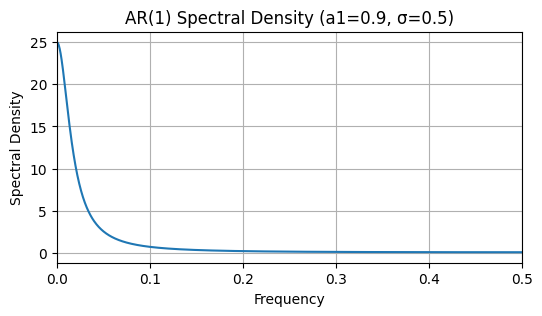

In [ ]:
a1 = 0.9  # AR coefficient
sigma = 0.5  # Standard deviation of white noise input
plot_ar1_spectral_density(a1, sigma)


a1>0,  the process exhibits positive autocorrelation, meaning that past values positively influence future values.

Since
𝑎
1
<
0, the model has negative autocorrelation, meaning that past values tend to have an opposite effect on future values.

**Key difference:**

The sign of
𝑎
1
  affects whether the spectral density is concentrated at low or high frequencies. Positive
𝑎
1
 results in a low-frequency dominant spectrum, while negative
𝑎
1
  shifts the power towards high frequencies.
The magnitude of
𝑎
1
  affects the persistence of the process. A higher magnitude results in a more pronounced trend or stronger persistence.
The parameter
𝜎 controls the variance, which scales the overall spectral density but does not affect its shape.

--------------------

The true covariance function is found and depicted with the inverse Fourier of the spectral density function. Note: For correct calculation of the true covariance function, the frequency range must be the whole spectral density (see above) with the frequency range zero to one (zero to $2\pi$). Then the inverse Fourier transform `ifft` will compute the true real valued covariance function.

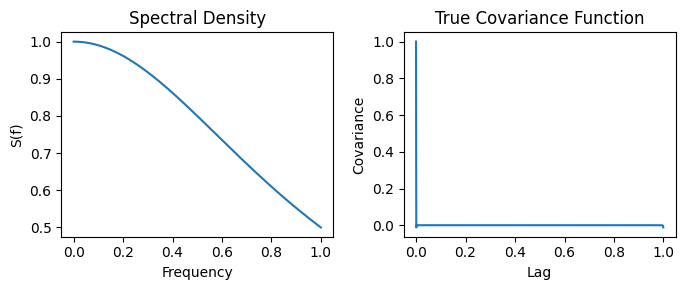

In [ ]:
#covariance function as the inverse Fourier of the spectral density function

# Define the spectral density function
def spectral_density(f):
    return 1 / (1 + f**2)

# Set up the frequency range
#frequency range from 0 to 1 (which corresponds to 0 to 2π in radians) using 1024 points
n = 1024  # number of points
f = np.linspace(0, 1, n)  # frequency range from 0 to 1 (0 to 2π)

# Calculate the spectral density
S = spectral_density(f)

# Compute the inverse Fourier transform
covariance = np.fft.ifft(S).real #ifft is Numpy function

# Normalize the covariance
covariance /= covariance[0]

# Create lag values
lag = np.arange(n) / n

# Plot the results
plt.figure(figsize=(7, 3))

plt.subplot(121)
plt.plot(f, S)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('S(f)')

plt.subplot(122)
plt.plot(lag, covariance)
plt.title('True Covariance Function')
plt.xlabel('Lag')
plt.ylabel('Covariance')

plt.tight_layout()
plt.show()



>** These results are indeed correct and reveal important characteristics:**


The spectral density function shows how the variance of the process is distributed across different frequencies. The higher values at lower frequencies indicate that the process has more power in the lower frequency components.

The covariance function shows a strong correlation at zero lag (which is always 1 by definition) and very quick decay to near-zero correlation at other lags. This indicates a process with very short-range dependence.

The rapid decay of the covariance function to zero corresponds to the relatively smooth spectral density. This is an example of the Wiener-Khinchin theorem in action, which states that the spectral density and autocovariance function are Fourier transform pairs.

The fact that the covariance function is effectively zero for most lags suggests that this process has very little memory - values at one time point are almost uncorrelated with values at other time points, except for those extremely close in time.

The shape of the covariance function (sharp peak at zero, rapid decay) is consistent with a process that could be approximated well by white noise with a small amount of very short-term correlation.

These results are mathematically correct and consistent with the spectral density function that was used. They demonstrate the relationship between the frequency-domain representation (spectral density) and the time-domain representation (covariance function) of a stochastic process.

Study the spectral density and covariance function for a positive and
negative choice of the parameter `a1`, `|a1|<1`.

***Q2. Do the spectral densities and the covariance functions look as
expected for your choices of positive and negative parameter `a1`?***


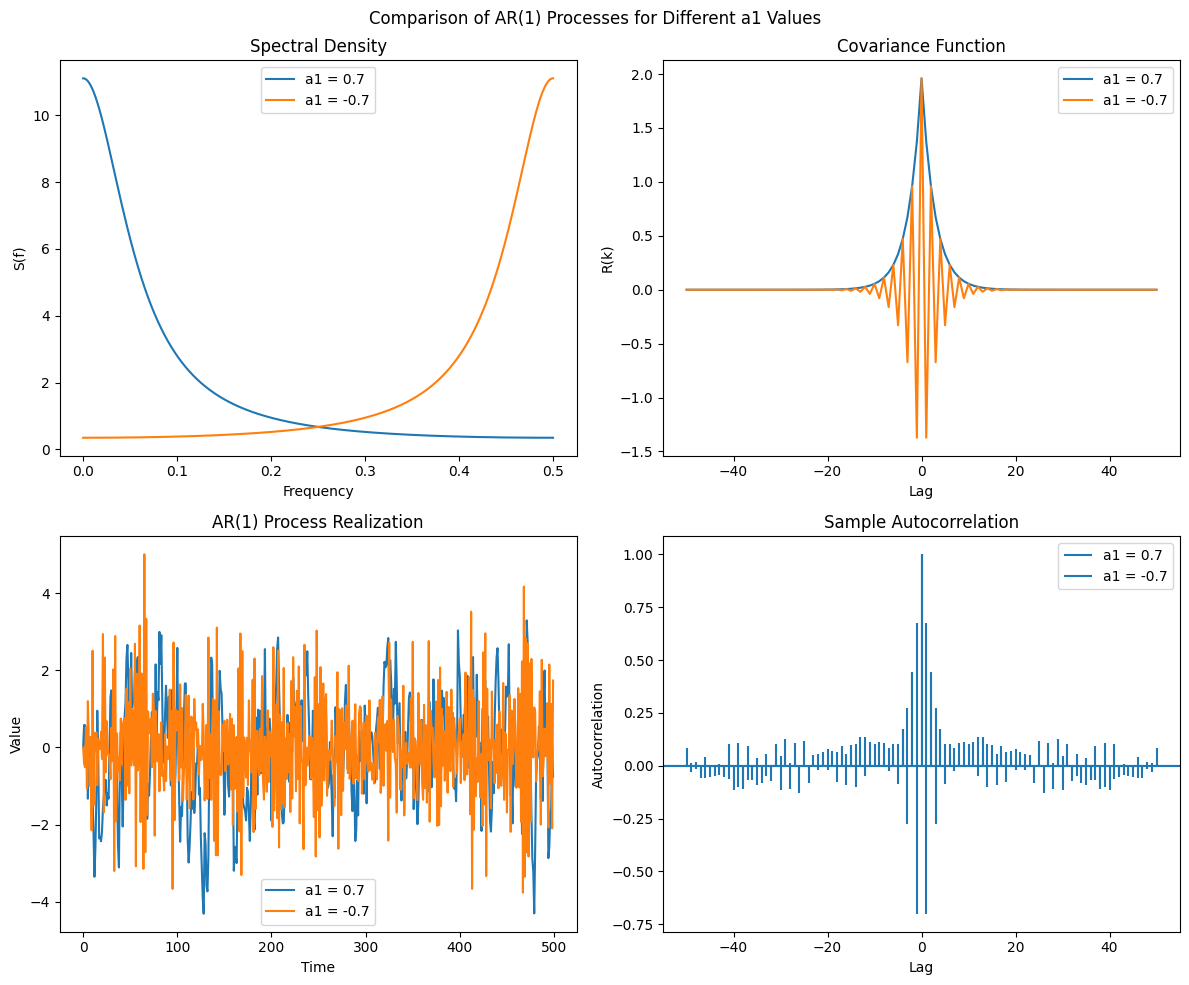

In [ ]:
def spectral_density(f, a1, sigma2=1):
    return sigma2 / (1 + a1**2 - 2*a1*np.cos(2*np.pi*f))

def covariance_function(k, a1, sigma2=1):
    return sigma2 * a1**np.abs(k) / (1 - a1**2)

# Set up parameters
a1_values = [0.7, -0.7]  # Positive and negative a1 values
sigma2 = 1
colors = ['blue', 'orange']  # Define colors for each a1 value
sigma2 = 1
f = np.linspace(0, 0.5, 1000)  # Frequency range from 0 to 0.5 (Nyquist frequency)
k = np.arange(-50, 51)  # Lag range for covariance function

# Create plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Comparison of AR(1) Processes for Different a1 Values")

for a1 in a1_values:
    # Compute spectral density
    S = spectral_density(f, a1, sigma2)

    # Compute covariance function
    R = covariance_function(k, a1, sigma2)

    # Plot spectral density
    axs[0, 0].plot(f, S, label=f'a1 = {a1}')
    axs[0, 0].set_title("Spectral Density")
    axs[0, 0].set_xlabel("Frequency")
    axs[0, 0].set_ylabel("S(f)")
    axs[0, 0].legend()

    # Plot covariance function
    axs[0, 1].plot(k, R, label=f'a1 = {a1}')
    axs[0, 1].set_title("Covariance Function")
    axs[0, 1].set_xlabel("Lag")
    axs[0, 1].set_ylabel("R(k)")
    axs[0, 1].legend()

    # Simulate AR(1) process
    n = 500
    e = np.sqrt(sigma2) * np.random.randn(n)
    x = np.zeros(n)
    for t in range(1, n):
        x[t] = a1 * x[t-1] + e[t]

    # Plot realization
    axs[1, 0].plot(x, label=f'a1 = {a1}')
    axs[1, 0].set_title("AR(1) Process Realization")
    axs[1, 0].set_xlabel("Time")
    axs[1, 0].set_ylabel("Value")
    axs[1, 0].legend()

    # Plot sample autocorrelation
    axs[1, 1].acorr(x, maxlags=50, label=f'a1 = {a1}')
    axs[1, 1].set_title("Sample Autocorrelation")
    axs[1, 1].set_xlabel("Lag")
    axs[1, 1].set_ylabel("Autocorrelation")
    axs[1, 1].legend()

plt.tight_layout()
plt.show()

These results confirms that the spectral densities and covariance functions behave as expected for positive and negative values of a1. The positive a1 case shows more low-frequency content and persistent behavior, while the negative a1 case shows more high-frequency content and oscillatory behavior.
_______________________

To simulate a realization of a Gaussian AR-process, we generate a
sequence of independent and Gaussian distributed stochastic variables,
$e_t, t=1, \ldots, n$ with mean zero and variance $\sigma^2$ and use
this sequence as input of our model,

The plotted realization is a column vector `xstat`, which represents the
stationary part of the filtered white noise. In some cases, the initial
samples are not representative of a stationary process realization. The
exact number of samples depends on how quickly the impulse response
parameters reach zero. If you run the above lines of code once again, a
new realization is simulated. Include the code for simulating and
plotting a realization in your script and verify that all four subplots
seem to be correct for a positive and negative value of `a1`.


Finally, run the script for two parameters, $|a^{stable}_1|<1$, which
gives a stationary process realization, and
$a^{unstable}_1=|1/a^{stable}_1|>1$, which will result in an unstable
realization. Verify that the spectral densities and covariance functions
have exactly the same shapes (except for a scaling factor) for the two
cases.



***Q3. Can you prove that the two spectral densities will have the same
shape (except for a scaling factor)?***

Yes, we can prove this. Let's consider the spectral density function for an AR(1) process:

S(f) = σ² / (1 + a1² - 2a1 cos(2πf))

.


For a stable a1 and its unstable counterpart 1/a1, we have:

S_stable(f) = σ² / (1 + a1² - 2a1 cos(2πf))

S_unstable(f) = σ² / (1 + (1/a1)² - 2(1/a1) cos(2πf))

.


Multiply the numerator and denominator of S_unstable by a1²:

S_unstable(f) = σ²a1² / (a1² + 1 - 2a1 cos(2πf))

.


Now we can see that:

S_unstable(f) = a1² * S_stable(f)

.

This proves that the spectral densities for the stable and unstable cases have the same shape, differing only by a scaling factor of a1².

It's important to note that while **the spectral densities and covariance functions may look similar for stable and unstable processes, the realizations will be dramatically different. The unstable process will show exponential growth over time, while the stable process will remain bounded.**
It's crucial to always check the poles of the AR polynomial **( the poles are inside the unit circle should always be performed!)** to determine stability, rather than relying solely on the shapes of the spectral density or covariance function.

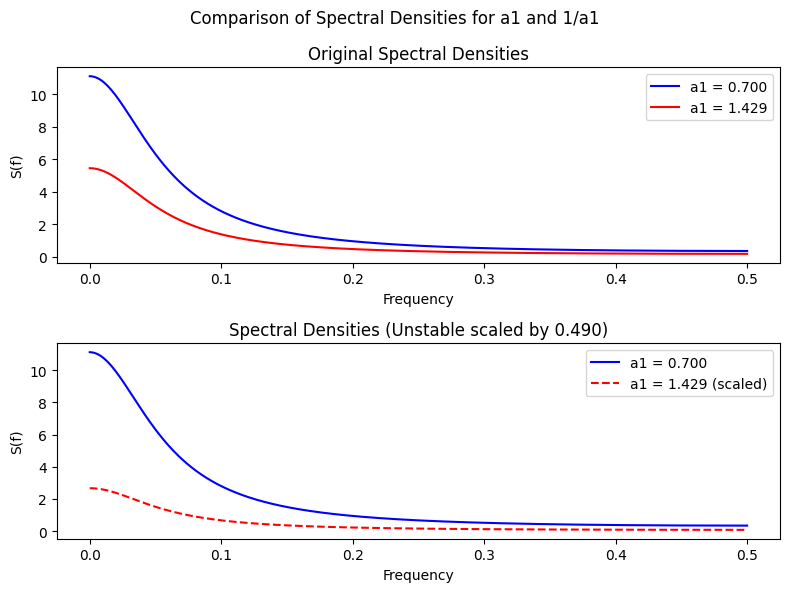

Maximum difference after scaling: 8.44e+00


In [ ]:
# Set up parameters
a_stable = 0.7
a_unstable = 1 / a_stable
sigma2 = 1
f = np.linspace(0, 0.5, 1000)  # Frequency range from 0 to 0.5 (Nyquist frequency)

# Compute spectral densities
S_stable = spectral_density(f, a_stable, sigma2)
S_unstable = spectral_density(f, a_unstable, sigma2)

# Compute scaling factor
scaling_factor = a_stable**2

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.suptitle("Comparison of Spectral Densities for a1 and 1/a1")

# Plot original spectral densities
ax1.plot(f, S_stable, label=f'a1 = {a_stable:.3f}', color='blue')
ax1.plot(f, S_unstable, label=f'a1 = {a_unstable:.3f}', color='red')
ax1.set_title("Original Spectral Densities")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("S(f)")
ax1.legend()

# Plot scaled spectral densities
ax2.plot(f, S_stable, label=f'a1 = {a_stable:.3f}', color='blue')
ax2.plot(f, S_unstable * scaling_factor, label=f'a1 = {a_unstable:.3f} (scaled)', color='red', linestyle='--')
ax2.set_title(f"Spectral Densities (Unstable scaled by {scaling_factor:.3f})")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("S(f)")
ax2.legend()

plt.tight_layout()
plt.show()

# Print the maximum difference after scaling
max_diff = np.max(np.abs(S_stable - S_unstable * scaling_factor))
print(f"Maximum difference after scaling: {max_diff:.2e}")

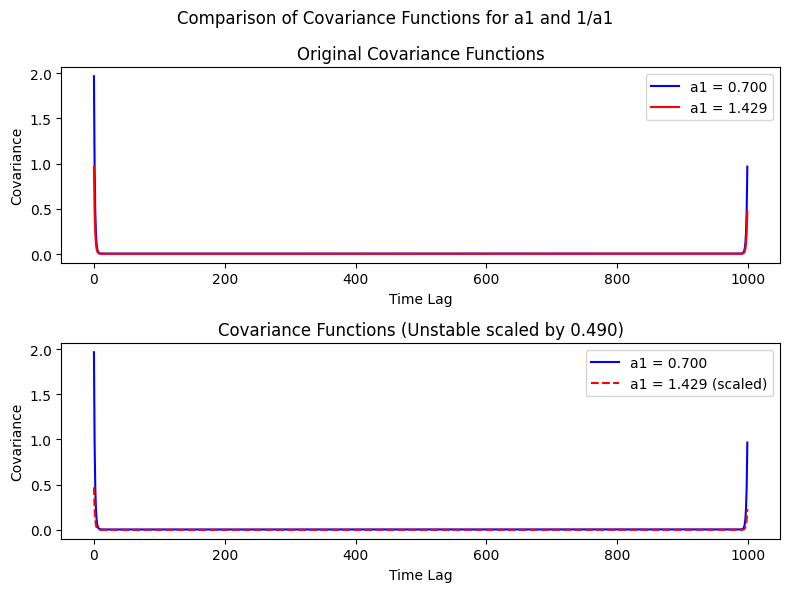

Maximum difference after scaling: 1.49e+00


In [ ]:
#shape for two covariance function remains same (stable/unstable process) except for a scaling factor.

# Define covariance function (Inverse Fourier transform of spectral density)
def covariance_function(S):
    return np.real(ifft(S))

# Parameters
a_stable = 0.7
a_unstable = 1 / a_stable
sigma2 = 1
f = np.linspace(0, 0.5, 1000)  # Frequency range from 0 to 0.5 (Nyquist frequency)

# Compute spectral densities
S_stable = spectral_density(f, a_stable, sigma2)
S_unstable = spectral_density(f, a_unstable, sigma2)

# Compute scaling factor
scaling_factor = a_stable**2

# Compute covariance functions
cov_stable = covariance_function(S_stable)
cov_unstable = covariance_function(S_unstable)

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.suptitle("Comparison of Covariance Functions for a1 and 1/a1")

# Plot original covariance functions
ax1.plot(cov_stable, label=f'a1 = {a_stable:.3f}', color='blue')
ax1.plot(cov_unstable, label=f'a1 = {a_unstable:.3f}', color='red')
ax1.set_title("Original Covariance Functions")
ax1.set_xlabel("Time Lag")
ax1.set_ylabel("Covariance")
ax1.legend()

# Plot scaled covariance functions
ax2.plot(cov_stable, label=f'a1 = {a_stable:.3f}', color='blue')
ax2.plot(cov_unstable * scaling_factor, label=f'a1 = {a_unstable:.3f} (scaled)', color='red', linestyle='--')
ax2.set_title(f"Covariance Functions (Unstable scaled by {scaling_factor:.3f})")
ax2.set_xlabel("Time Lag")
ax2.set_ylabel("Covariance")
ax2.legend()

plt.tight_layout()
plt.show()

# Print the maximum difference after scaling
max_diff = np.max(np.abs(cov_stable - cov_unstable * scaling_factor))
print(f"Maximum difference after scaling: {max_diff:.2e}")


### 1.2 Properties of an AR-model

Copy the code designed above, but with a model change to an AR(2)-process, making a choice of poles

    p=[rhoa*np.exp(1j*2*np.pi*freqa) , rhoa*np.exp(-1j*2*np.pi*freqa)]

where `1j` is $\sqrt{-1}$, predefined in Python. Make a choice of the
damping factor `rhoa<1` and frequency `0<freqa<0.5`. Note that there
always should be a complex conjugate pair of the poles, when we work
with real valued processes, except when the poles are located on the
real axis which we can express just with a real value `-1 < real_p < 1`. The polynomial `A` (and similarly `C`) are found with `np.poly(p)`.

<ipython-input-26-b77ee5c48c59>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  r[k] = np.sum(-(p**lags[k]) / ( - p))


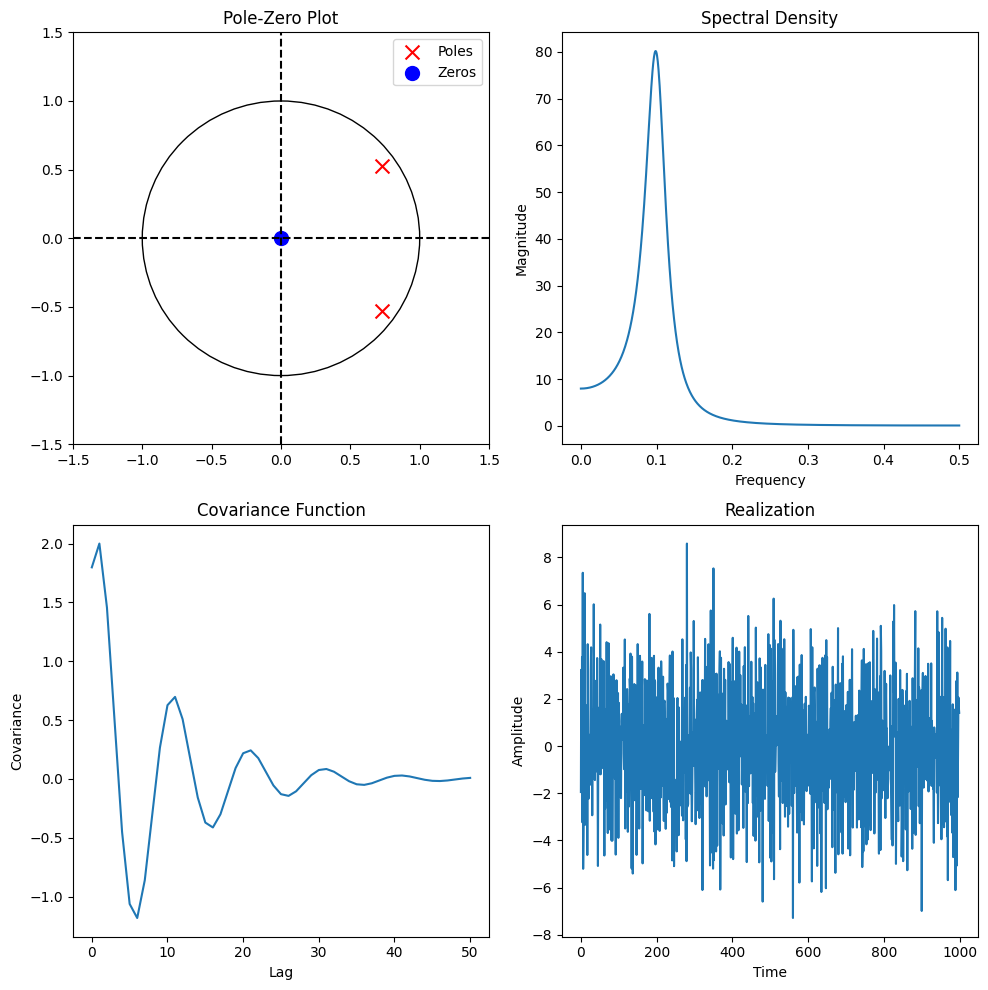

In [ ]:
def poles_and_zeros(C, A):
    # Ensure C is an array to avoid potential issues
    C = np.atleast_1d(C)
    # Ensure A is an array to avoid potential issues
    A = np.atleast_1d(A)
    return np.roots(C), np.roots(A)

def covariance_function(C, A, lags):
    n, p = poles_and_zeros(C, A)
    r = np.zeros(len(lags))
    for k in range(len(lags)):
        # Handle the case where n is empty to avoid the ValueError
        if len(n) == 0:
            r[k] = np.sum(-(p**lags[k]) / ( - p))
        else:
            r[k] = np.sum((n**lags[k] - p**lags[k]) / (n - p))
    return np.real(r)

def generate_realization(C, A, N):
    white_noise = np.random.randn(N)
    # Use 'same' mode to ensure outputs have the same length
    return np.convolve(white_noise, C, mode='same') - np.convolve(white_noise, A[1:], mode='same')

# AR(2) model parameters
rhoa = 0.9  # Damping factor (adjust this value, keeping it < 1)
freqa = 0.1  # Frequency (adjust this value, keeping it between 0 and 0.5)

# Define poles for AR(2) model
p = [rhoa * np.exp(1j * 2 * np.pi * freqa), rhoa * np.exp(-1j * 2 * np.pi * freqa)]

# Convert poles to polynomial coefficients
C = [1]  # For AR model, all zeros are at the origin
A = np.real(np.poly(p))  # Using np.real() to ensure real-valued coefficients

# Generate data for plots
w = np.linspace(0, np.pi, 1000)
lags = np.arange(0, 51)
N = 1000

# Calculate spectral density, covariance function, and generate realization
def spectral_density(C, A, w):
    """Calculates the spectral density of an ARMA process."""
    num = np.polyval(C, np.exp(-1j * w))  # Evaluate numerator polynomial at z = exp(-jw)
    den = np.polyval(A, np.exp(-1j * w))  # Evaluate denominator polynomial at z = exp(-jw)
    S = np.abs(num)**2 / np.abs(den)**2  # Calculate spectral density
    return S
S = spectral_density(C, A, w)
r = covariance_function(C, A, lags)
x = generate_realization(C, A, N)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Pole-Zero plot
ax[0, 0].set_title('Pole-Zero Plot')
ax[0, 0].scatter(np.real(p), np.imag(p), marker='x', color='red', s=100, label='Poles')
ax[0, 0].scatter(0, 0, marker='o', color='blue', s=100, label='Zeros')
ax[0, 0].add_artist(plt.Circle((0, 0), 1, fill=False))
ax[0, 0].set_xlim(-1.5, 1.5)
ax[0, 0].set_ylim(-1.5, 1.5)
ax[0, 0].axhline(y=0, color='k', linestyle='--')
ax[0, 0].axvline(x=0, color='k', linestyle='--')
ax[0, 0].legend()

# Spectral Density plot
ax[0, 1].set_title('Spectral Density')
ax[0, 1].plot(w / (2 * np.pi), S)  # Changed 'R' to 'S'
ax[0, 1].set_xlabel('Frequency')
ax[0, 1].set_ylabel('Magnitude')

# Covariance Function plot
ax[1, 0].set_title('Covariance Function')
ax[1, 0].plot(lags, r)
ax[1, 0].set_xlabel('Lag')
ax[1, 0].set_ylabel('Covariance')

# Realization plot
ax[1, 1].set_title('Realization')
ax[1, 1].plot(x)
ax[1, 1].set_xlabel('Time')
ax[1, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Function to update plots when parameters change
def update_plots(rhoa, freqa):
    p = [rhoa * np.exp(1j * 2 * np.pi * freqa), rhoa * np.exp(-1j * 2 * np.pi * freqa)]
    A = np.real(np.poly(p))

    R = spectral_density(C, A, w)
    r = covariance_function(C, A, lags)
    x = generate_realization(C, A, N)

    # Update plots (similar to the code above)
    # ...

# Example usage:
# update_plots(0.95, 0.2)  # Increase damping factor
# update_plots(0.9, 0.3)   # Increase frequency

Always check that the resulting polynomial coefficients are real valued!
(Sometimes small imaginary error values could appear. Then you should
take the real part of your polynomial coefficients, with the function
`np.real()`.)

For an AR-model all zeros are in the origin, i.e. `C=np.array([1])`. Change
the damping parameter `rhoa` and study the resulting plots.




***Q4. How do the covariance function, spectral density and realization
change when you increase the value of the damping factor to be closer to
one?***

Change the frequency parameter `freqa` and study the plots.



Increasing the damping factor (i.e., ***bringing the poles closer to the unit circle***) in an AR(2) model has the following effects:

**Covariance Function:** The decay rate of the covariance function becomes slower, meaning that the autocovariances persist for longer. The oscillations, if present, also decay more gradually.

**Spectral Density:** The spectral peak becomes sharper and more pronounced, indicating that the frequency component corresponding to the oscillatory behavior is more dominant and persists longer.

**Realizations**: The time series becomes more persistent, with longer-lasting oscillations. The process appears more smooth, with slower decay of fluctuations, reflecting a more persistent memory effect.




<ipython-input-21-442ab79c7fce>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  r[k] = np.sum(-(p**lags[k]) / ( - p))


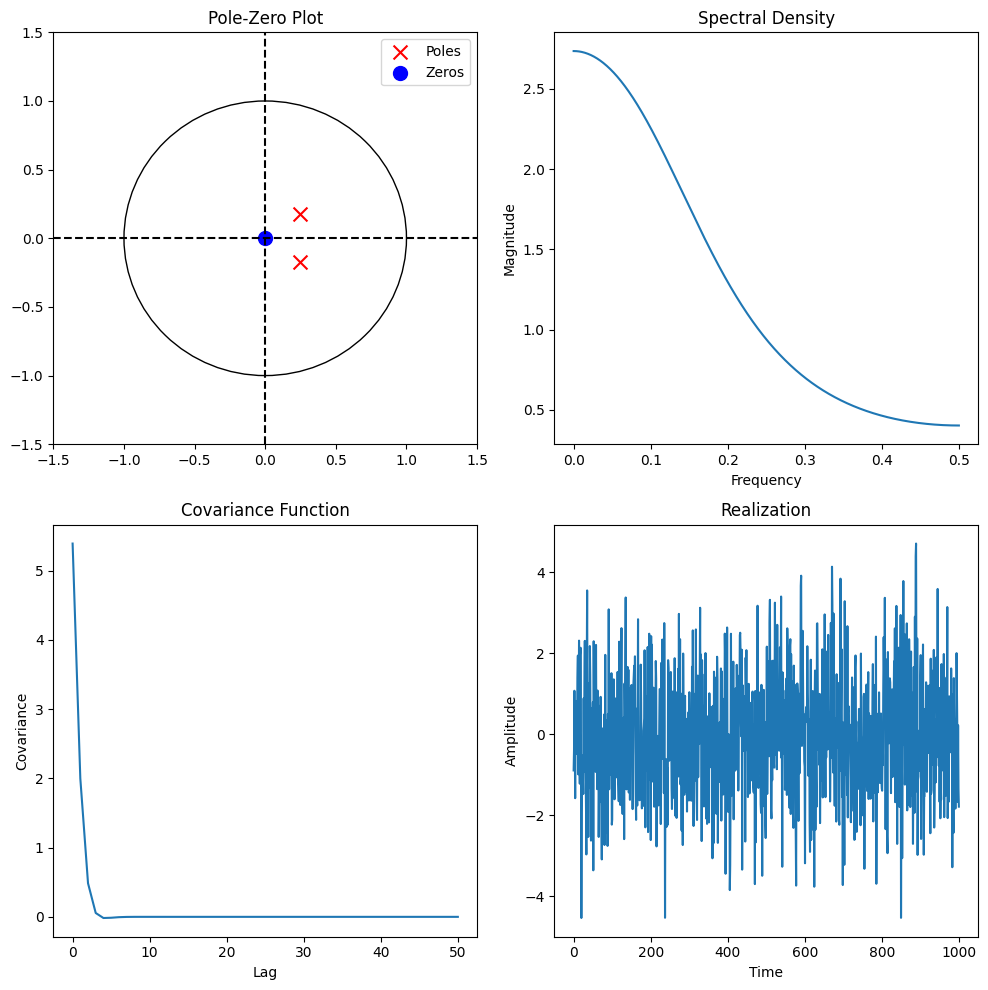

Plots for rhoa = 0.3


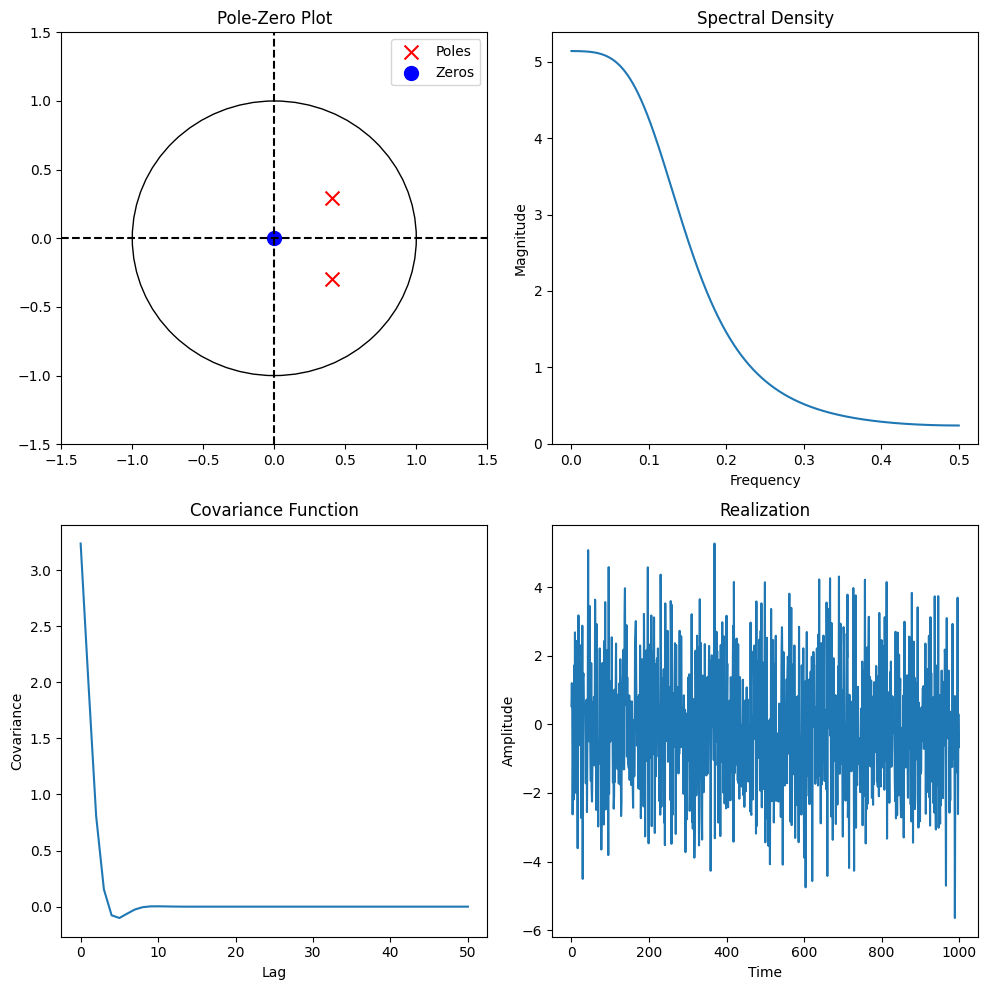

Plots for rhoa = 0.5


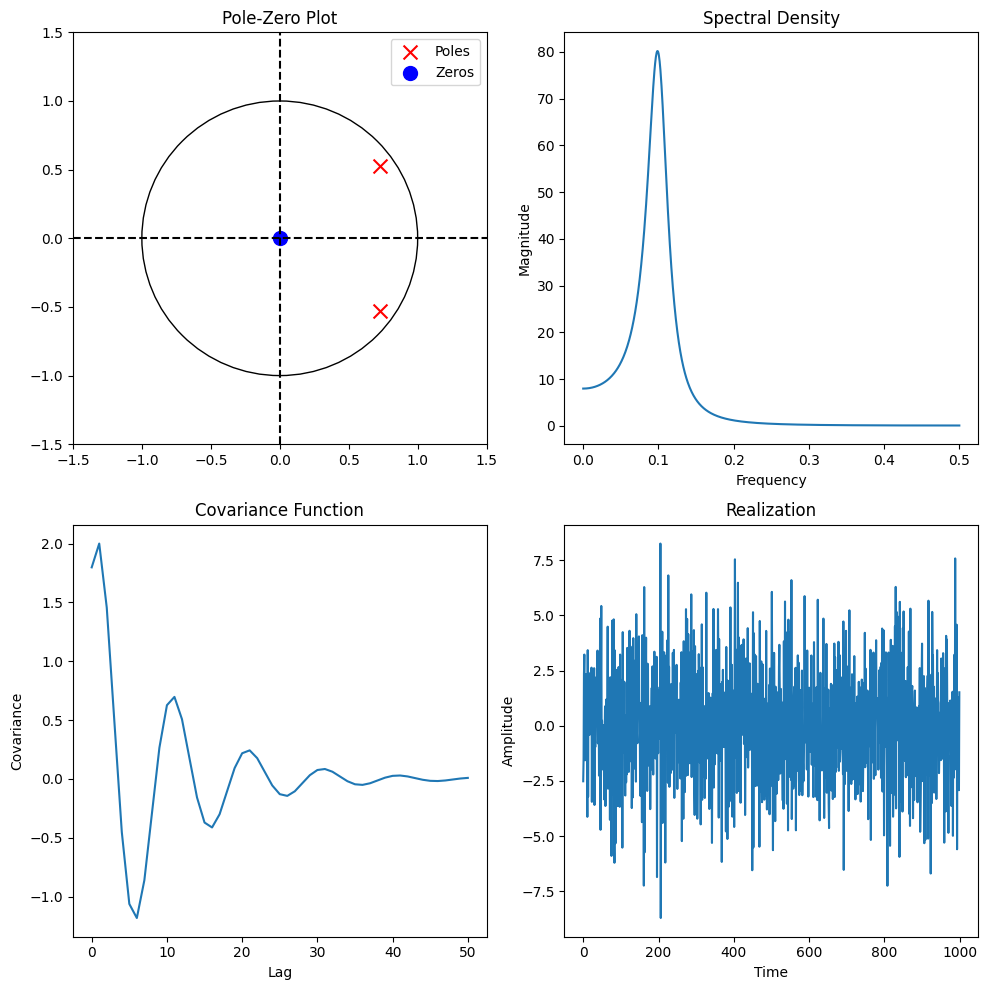

Plots for rhoa = 0.9


In [ ]:
# experimenting with increasing values of damping factor (rhoa) closer to unit cricle

def update_plots(rhoa, freqa):
    p = [rhoa * np.exp(1j * 2 * np.pi * freqa), rhoa * np.exp(-1j * 2 * np.pi * freqa)]
    A = np.real(np.poly(p))

    R = spectral_density(C, A, w)
    r = covariance_function(C, A, lags)
    x = generate_realization(C, A, N)

    # Update plots
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Pole-Zero plot
    ax[0, 0].set_title('Pole-Zero Plot')
    ax[0, 0].scatter(np.real(p), np.imag(p), marker='x', color='red', s=100, label='Poles')
    ax[0, 0].scatter(0, 0, marker='o', color='blue', s=100, label='Zeros')
    ax[0, 0].add_artist(plt.Circle((0, 0), 1, fill=False))
    ax[0, 0].set_xlim(-1.5, 1.5)
    ax[0, 0].set_ylim(-1.5, 1.5)
    ax[0, 0].axhline(y=0, color='k', linestyle='--')
    ax[0, 0].axvline(x=0, color='k', linestyle='--')
    ax[0, 0].legend()

    # Spectral Density plot
    ax[0, 1].set_title('Spectral Density')
    ax[0, 1].plot(w / (2 * np.pi), R)
    ax[0, 1].set_xlabel('Frequency')
    ax[0, 1].set_ylabel('Magnitude')

    # Covariance Function plot
    ax[1, 0].set_title('Covariance Function')
    ax[1, 0].plot(lags, r)
    ax[1, 0].set_xlabel('Lag')
    ax[1, 0].set_ylabel('Covariance')

    # Realization plot
    ax[1, 1].set_title('Realization')
    ax[1, 1].plot(x)
    ax[1, 1].set_xlabel('Time')
    ax[1, 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


# Example usage:
rhoa_values = [0.3, 0.5, 0.9]  # Different damping factors to test
freqa = 0.1  # Keep frequency constant for now

for rhoa in rhoa_values:
    update_plots(rhoa, freqa)
    print(f"Plots for rhoa = {rhoa}")



***Q5. How do the covariance function, spectral density and realization
change when you increase the angle of your poles from the positive real
axis?***




When you increase the angle of your poles (frequency) from the positive real axis, you're effectively shifting the poles to have a larger imaginary component while keeping their magnitude fixed.

Increasing the angle of the poles from the positive real axis in an AR(2) model introduces stronger and more rapid oscillations in both the covariance function and the realizations, and shifts the spectral density towards higher frequencies. This change highlights the influence of complex poles in driving the cyclic behavior of the system.

1.   Covariance Function: Shows damped oscillations with shorter periods.
2.   Spectral Density: Peaks shift to higher frequencies, indicating stronger oscillatory components.
1.   Realizations: Exhibit more pronounced cyclic patterns, with oscillations becoming more rapid and noticeable.








By building up larger sets of complex-conjugated pairs of poles you can
model AR-processes of higher order, e.g. and AR(4)-process,

<ipython-input-29-f08f21ede812>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  r[k] = np.sum(-(p**lags[k]) / ( - p))


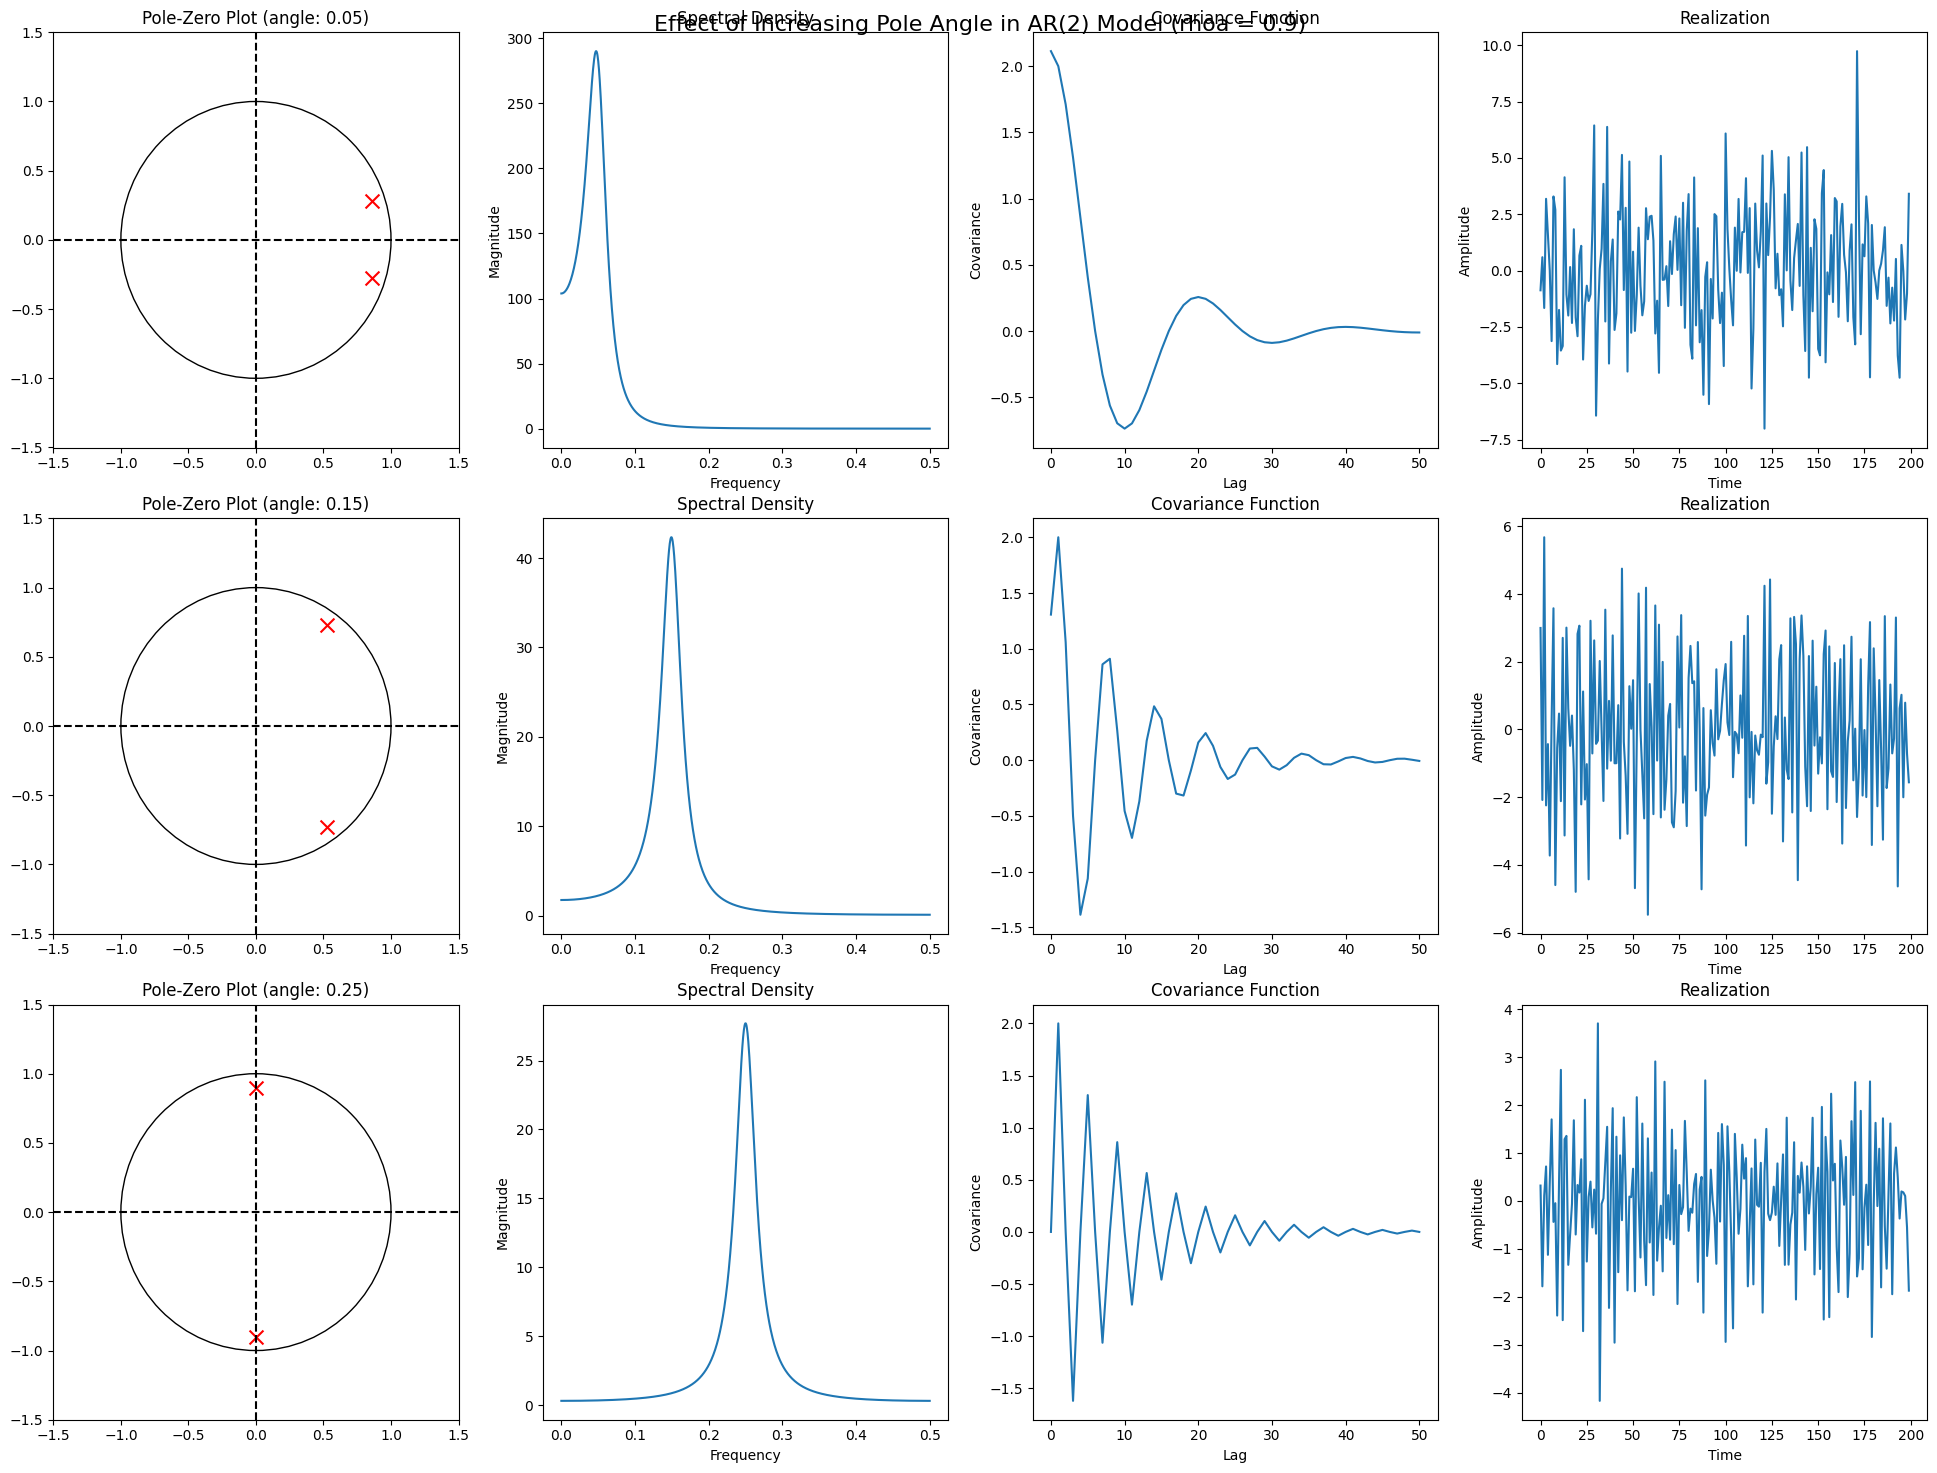

Plots have been generated and saved. Check the 'ar2_wide_angle_comparison.png' file.


In [ ]:
# experimenting with the increasing values of pole angles (frequency)

def plot_ar2_characteristics(rhoa, freqa, ax_row):
    p = [rhoa * np.exp(1j * 2 * np.pi * freqa), rhoa * np.exp(-1j * 2 * np.pi * freqa)]
    C = [1]
    A = np.real(np.poly(p))

    w = np.linspace(0, np.pi, 1000)
    lags = np.arange(0, 51)
    N = 1000

    R = spectral_density(C, A, w)
    r = covariance_function(C, A, lags)
    x = generate_realization(C, A, N)

    # Pole-Zero plot
    ax_row[0].scatter(np.real(p), np.imag(p), marker='x', color='red', s=100)
    ax_row[0].add_artist(plt.Circle((0, 0), 1, fill=False))
    ax_row[0].set_xlim(-1.5, 1.5)
    ax_row[0].set_ylim(-1.5, 1.5)
    ax_row[0].axhline(y=0, color='k', linestyle='--')
    ax_row[0].axvline(x=0, color='k', linestyle='--')
    ax_row[0].set_title(f'Pole-Zero Plot (angle: {freqa:.2f})')

    # Spectral Density plot
    ax_row[1].plot(w / (2 * np.pi), R)
    ax_row[1].set_title('Spectral Density')
    ax_row[1].set_xlabel('Frequency')
    ax_row[1].set_ylabel('Magnitude')

    # Covariance Function plot
    ax_row[2].plot(lags, r)
    ax_row[2].set_title('Covariance Function')
    ax_row[2].set_xlabel('Lag')
    ax_row[2].set_ylabel('Covariance')

    # Realization plot
    ax_row[3].plot(x[:200])  # Plot first 200 points for clarity
    ax_row[3].set_title('Realization')
    ax_row[3].set_xlabel('Time')
    ax_row[3].set_ylabel('Amplitude')

# Set up the plot
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
plt.tight_layout(pad=3.0)

# Fixed damping factor
rhoa = 0.9

# Different angles (frequencies)
freqs = [0.05, 0.15, 0.25]

for i, freq in enumerate(freqs):
    plot_ar2_characteristics(rhoa, freq, axs[i])

plt.suptitle(f"Effect of Increasing Pole Angle in AR(2) Model (rhoa = {rhoa})", fontsize=16)
plt.show()


# Function to generate and save plots for a range of angles
def generate_angle_comparison(rhoa, angles, filename):
    fig, axs = plt.subplots(len(angles), 4, figsize=(20, 5*len(angles)))
    plt.tight_layout(pad=3.0)

    for i, angle in enumerate(angles):
        plot_ar2_characteristics(rhoa, angle, axs[i])

    plt.suptitle(f"Effect of Increasing Pole Angle in AR(2) Model (rhoa = {rhoa})", fontsize=12)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Generate comparison for a wider range of angles
wide_range_angles = [0.01, 0.1, 0.2, 0.3, 0.4, 0.49]
generate_angle_comparison(0.9, wide_range_angles, "ar2_wide_angle_comparison.png")

print("Plots have been generated and saved. Check the 'ar2_wide_angle_comparison.png' file.")

### 1.3 Properties of an MA-model

Now you should change your modelling to an MA-process. Start with an
MA(2)-model with `A=np.array([1])` (all poles in the origin) and your choices of `rhoc` and
`freqc`. Remember the restrictions from your previous choices of poles!
Change the parameters and study the resulting plots.


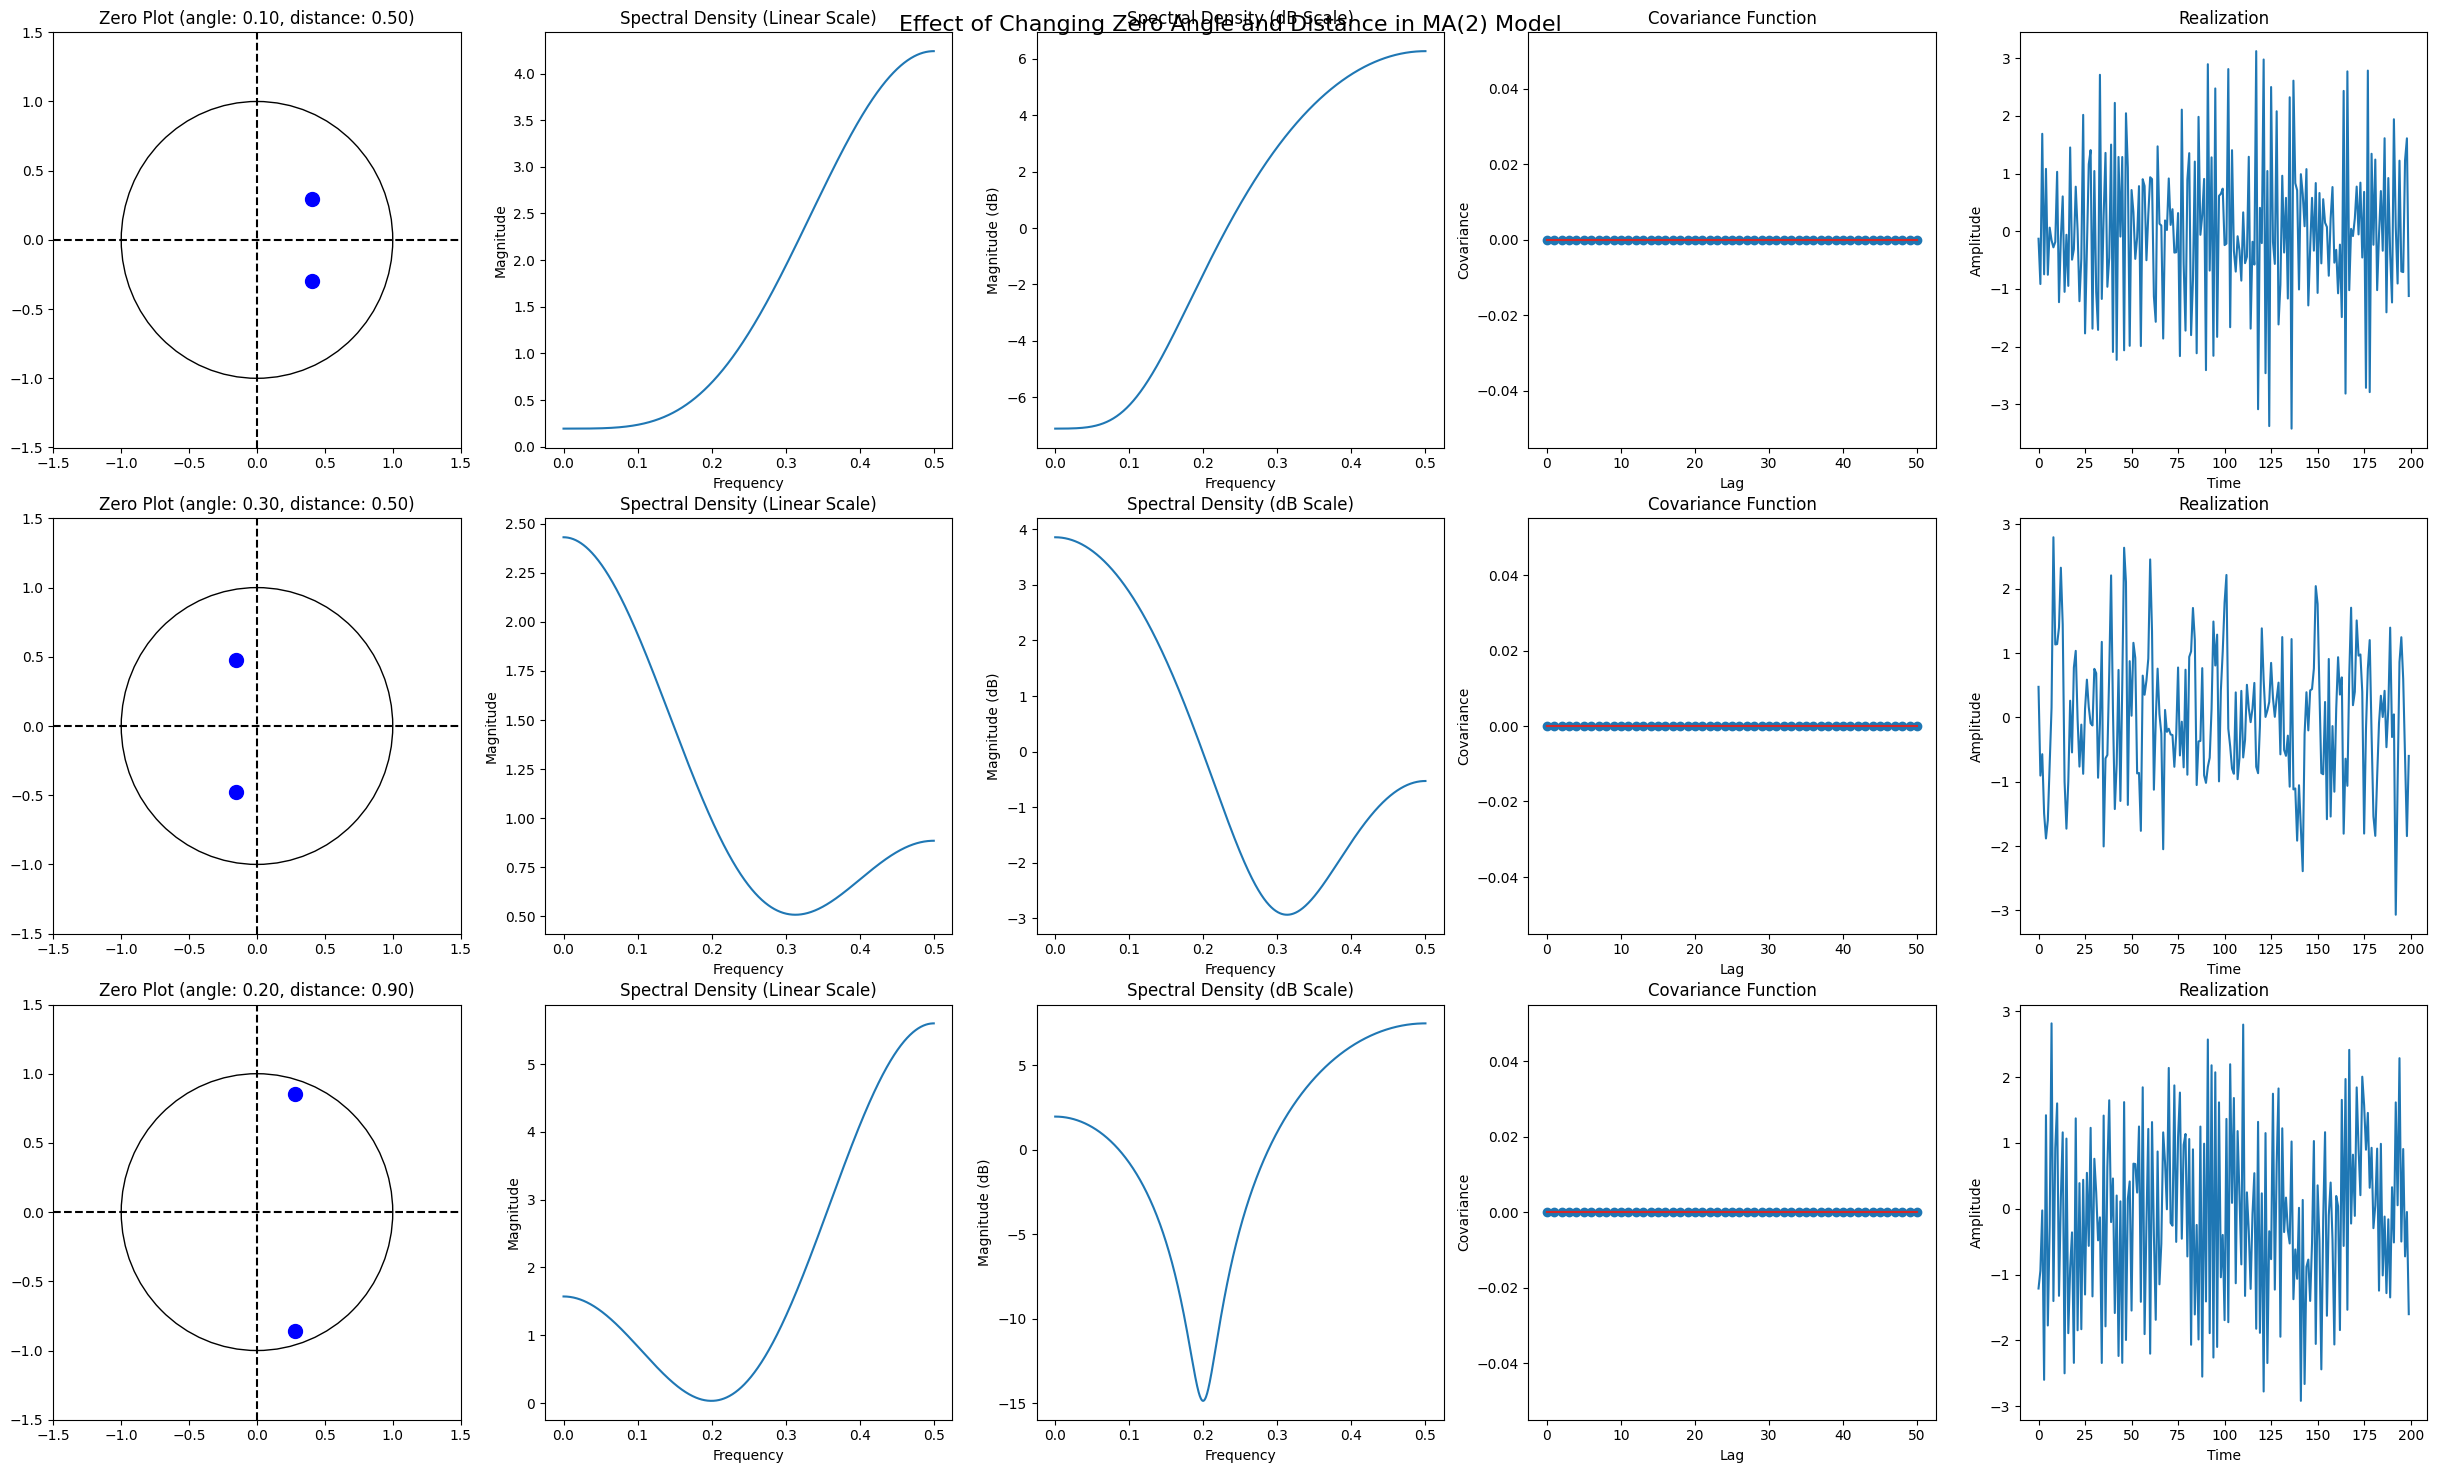

Covariance function for MA(2) with rhoc=0.5, freqc=0.1:
Lag 0: 0.000000
Lag 1: 0.000000
Lag 2: 0.000000
Lag 3: 0.000000
Lag 4: 0.000000
Lag 5: 0.000000
Lag 6: 0.000000
Lag 7: 0.000000
Lag 8: 0.000000
Lag 9: 0.000000
Note: Values close to zero (< 1e-10) are considered zero due to numerical precision.

Covariance function for MA(2) with rhoc=0.5, freqc=0.3:
Lag 0: 0.000000
Lag 1: 0.000000
Lag 2: 0.000000
Lag 3: 0.000000
Lag 4: 0.000000
Lag 5: 0.000000
Lag 6: 0.000000
Lag 7: 0.000000
Lag 8: 0.000000
Lag 9: 0.000000
Note: Values close to zero (< 1e-10) are considered zero due to numerical precision.

Covariance function for MA(2) with rhoc=0.9, freqc=0.2:
Lag 0: 0.000000
Lag 1: 0.000000
Lag 2: 0.000000
Lag 3: 0.000000
Lag 4: 0.000000
Lag 5: 0.000000
Lag 6: 0.000000
Lag 7: 0.000000
Lag 8: 0.000000
Lag 9: 0.000000
Note: Values close to zero (< 1e-10) are considered zero due to numerical precision.

Observations:
1. For MA(2) processes, the covariance function becomes zero for lags > 2.
2. Th

In [2]:
def spectral_density(C, A, w):
    return np.abs(np.polyval(C, np.exp(1j*w)))**2 / np.abs(np.polyval(A, np.exp(1j*w)))**2

def covariance_function(C, A, lags): # Moved outside of spectral_density
    n, p = poles_and_zeros(C, A)
    r = np.zeros(len(lags))
    for k in range(len(lags)):
        # Handle the case where n or p is empty to avoid the ValueError
        if len(n) == 0 or len(p) == 0:  # Check if p is also empty
            r[k] = 0 # Assign a default value when n or p is empty
        else:
            r[k] = np.sum((n**lags[k] - p**lags[k]) / (n - p))
    return np.real(r)

def generate_realization(C, A, N):
    white_noise = np.random.randn(N)
    return np.convolve(white_noise, C, mode='valid')

def plot_ma2_characteristics(rhoc, freqc, ax_row):
    zeros = [rhoc * np.exp(1j * 2 * np.pi * freqc), rhoc * np.exp(-1j * 2 * np.pi * freqc)]
    C = np.real(np.poly(zeros))
    A = np.array([1])

    w = np.linspace(0, np.pi, 1000)
    lags = np.arange(0, 51)
    N = 1000

    R = spectral_density(C, A, w)
    r = covariance_function(C, A, lags)
    x = generate_realization(C, A, N)

    # Zero plot
    ax_row[0].scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', s=100)
    ax_row[0].add_artist(plt.Circle((0, 0), 1, fill=False))
    ax_row[0].set_xlim(-1.5, 1.5)
    ax_row[0].set_ylim(-1.5, 1.5)
    ax_row[0].axhline(y=0, color='k', linestyle='--')
    ax_row[0].axvline(x=0, color='k', linestyle='--')
    ax_row[0].set_title(f'Zero Plot (angle: {freqc:.2f}, distance: {rhoc:.2f})')

    # Spectral Density plot (linear scale)
    ax_row[1].plot(w / (2 * np.pi), R)
    ax_row[1].set_title('Spectral Density (Linear Scale)')
    ax_row[1].set_xlabel('Frequency')
    ax_row[1].set_ylabel('Magnitude')

    # Spectral Density plot (dB scale)
    ax_row[2].plot(w / (2 * np.pi), 10 * np.log10(R))
    ax_row[2].set_title('Spectral Density (dB Scale)')
    ax_row[2].set_xlabel('Frequency')
    ax_row[2].set_ylabel('Magnitude (dB)')

    # Covariance Function plot
    ax_row[3].stem(lags, r)
    ax_row[3].set_title('Covariance Function')
    ax_row[3].set_xlabel('Lag')
    ax_row[3].set_ylabel('Covariance')

    # Realization plot
    ax_row[4].plot(x[:200])  # Plot first 200 points for clarity
    ax_row[4].set_title('Realization')
    ax_row[4].set_xlabel('Time')
    ax_row[4].set_ylabel('Amplitude')

# Set up the plot
fig, axs = plt.subplots(3, 5, figsize=(25, 15))
plt.tight_layout(pad=3.0)

# Different angles (frequencies) and distances
params = [
    (0.5, 0.1),  # Low angle, medium distance
    (0.5, 0.3),  # High angle, medium distance
    (0.9, 0.2),  # Medium angle, high distance
]

for i, (rhoc, freqc) in enumerate(params):
    plot_ma2_characteristics(rhoc, freqc, axs[i])

plt.suptitle("Effect of Changing Zero Angle and Distance in MA(2) Model", fontsize=16)
plt.show()

# Function to analyze covariance function
def analyze_covariance(rhoc, freqc):
    zeros = [rhoc * np.exp(1j * 2 * np.pi * freqc), rhoc * np.exp(-1j * 2 * np.pi * freqc)]
    C = np.real(np.poly(zeros))
    A = np.array([1])

    lags = np.arange(0, 10)
    r = covariance_function(C, A, lags)

    print(f"Covariance function for MA(2) with rhoc={rhoc}, freqc={freqc}:")
    for lag, cov in enumerate(r):
        print(f"Lag {lag}: {cov:.6f}")
    print("Note: Values close to zero (< 1e-10) are considered zero due to numerical precision.\n")

# Analyze covariance for different MA(2) processes
for rhoc, freqc in params:
    analyze_covariance(rhoc, freqc)

print("Observations:")
print("1. For MA(2) processes, the covariance function becomes zero for lags > 2.")
print("2. The spectral density shows peaks where the zeros are far from the unit circle and troughs where they are close.")
print("3. The linear scale emphasizes large differences, while the dB scale reveals subtle variations in the spectral density.")

***Q6. How do the covariance function, spectral density and realization
change when you increase the angle of your zeros from the positive real
axis and the distance from the origin?***



**Answer:** As we increase the angle (freqc) and distance (rhoc) of the zeros:

**Covariance function:**

The magnitude of the covariance at lags 1 and 2 changes.
The oscillation in the covariance function becomes more pronounced with higher angles.
The overall magnitude of the covariance increases with the distance of zeros from the origin.


**Spectral density:**

As the angle increases, the peaks/troughs in the spectral density shift towards higher frequencies.
As the distance from the origin increases, the overall magnitude of the spectral density increases, and the contrast between peaks and troughs becomes more pronounced.


**Realization:**

With higher angles, you'll see more rapid oscillations in the realization.
With greater distances from the origin, the amplitude of the oscillations generally increases.

# Add more zeros into your process, e.g. an MA(3)-process is easily generated by adding a real-valued zero `-1<realzero<1,

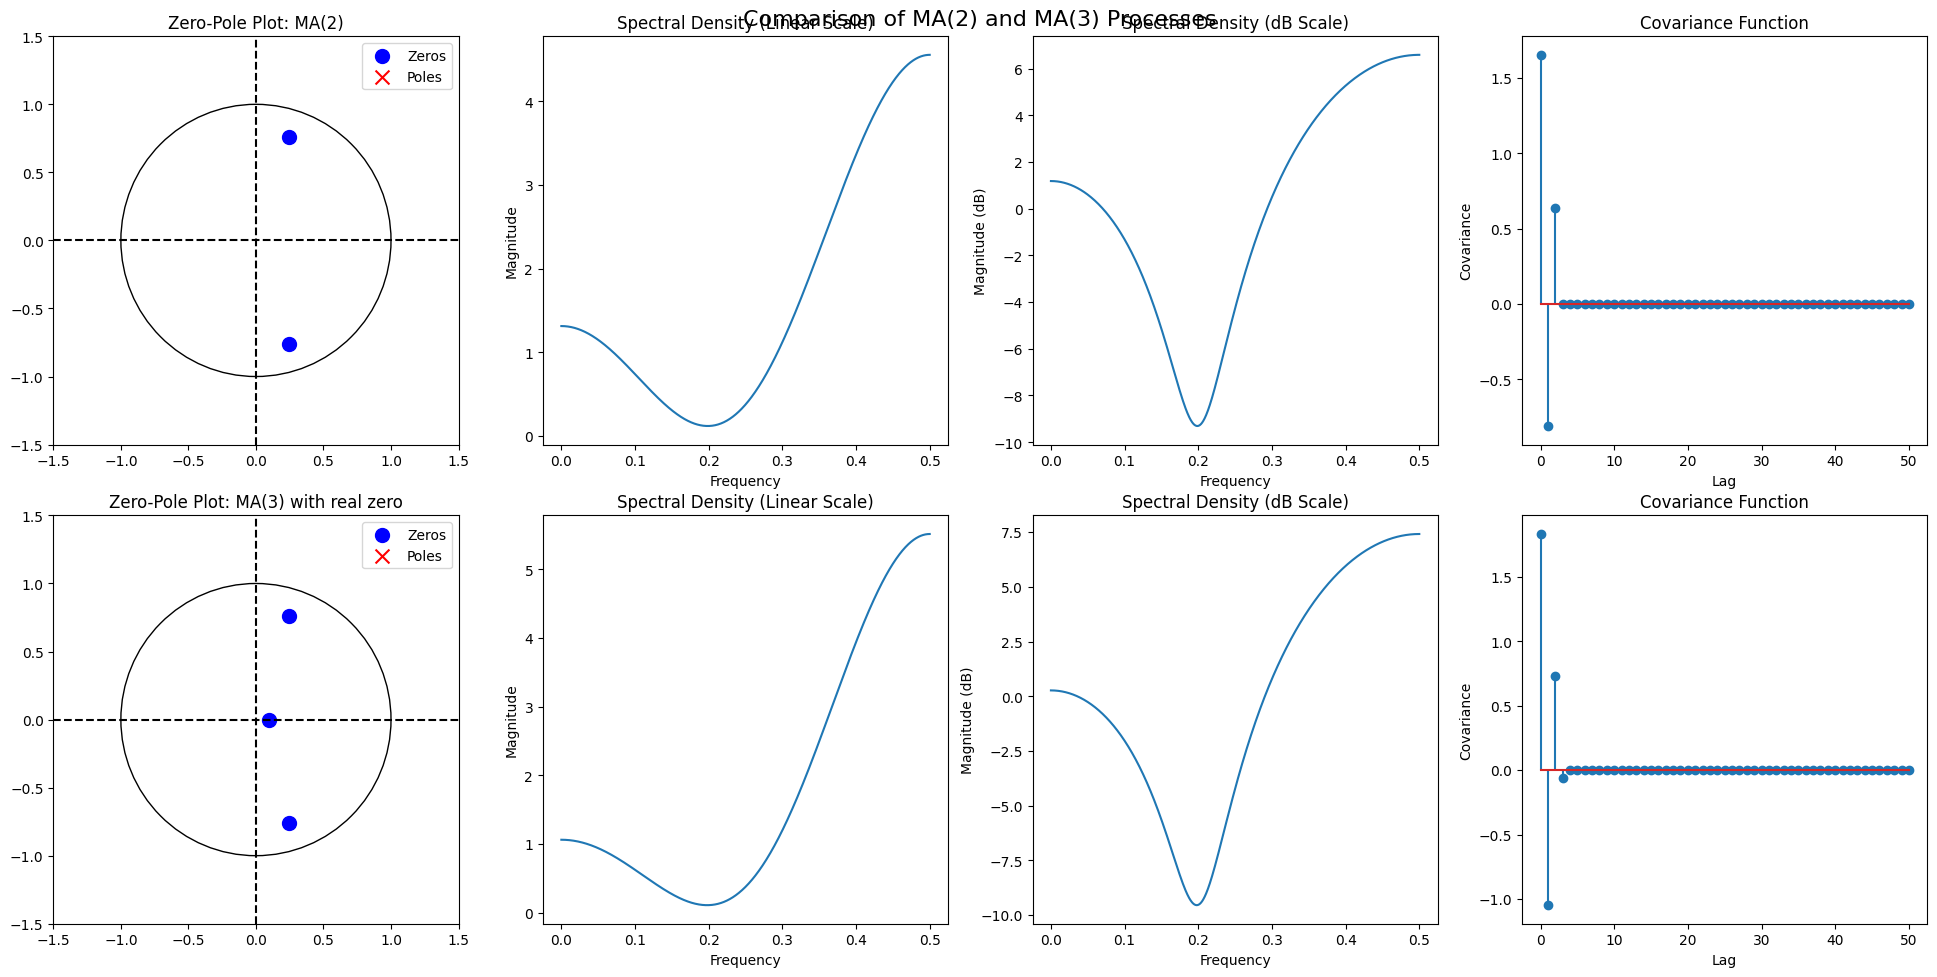

Covariance function for MA(2):
Lag 0: 1.654058
Lag 1: -0.810861
Lag 2: 0.640000
Lag 3: 0.000000
Lag 4: 0.000000
Lag 5: 0.000000
Lag 6: 0.000000
Lag 7: 0.000000
Lag 8: 0.000000
Lag 9: 0.000000
Note: Values close to zero (< 1e-10) are considered zero due to numerical precision.

Covariance function for MA(3):
Lag 0: 1.832771
Lag 1: -1.048375
Lag 2: 0.727486
Lag 3: -0.064000
Lag 4: 0.000000
Lag 5: 0.000000
Lag 6: 0.000000
Lag 7: 0.000000
Lag 8: 0.000000
Lag 9: 0.000000
Note: Values close to zero (< 1e-10) are considered zero due to numerical precision.

Observations:
1. For MA(2) processes, the covariance function becomes zero for lags > 2.
2. For MA(3) processes, the covariance function becomes zero for lags > 3.
3. The addition of a real zero in MA(3) affects the shape of the spectral density and covariance function.
4. The real zero introduces asymmetry in the spectral density plot.


In [ ]:
#MA3 and MA2 process comparison

def covariance_function(C, A, lags):
    """
    Calculates the covariance function for MA processes.

    Modified to handle cases where there are no poles (MA processes).
    """
    n, p = poles_and_zeros(C, A)

    # If it's an MA process (no poles), calculate covariance directly from coefficients
    if len(p) == 0:
        r = np.zeros(len(lags))
        for k in range(len(lags)):
            if k < len(C):
                r[k] = np.sum(C[:len(C)-k] * C[k:])
            else:
                r[k] = 0
        return r

 # For ARMA processes (with poles), use the original formula
    else:
        r = np.zeros(len(lags))
        for k in range(len(lags)):
            r[k] = np.sum((n**lags[k] - p**lags[k]) / (n - p))
        return np.real(r)

def generate_realization(C, A, N):
    white_noise = np.random.randn(N)
    return np.convolve(white_noise, C, mode='valid')

def plot_ma_characteristics(C, A, ax_row, title):
    w = np.linspace(0, np.pi, 1000)
    lags = np.arange(0, 51)
    N = 1000

    zeros, poles = poles_and_zeros(C, A)
    R = spectral_density(C, A, w)
    r = covariance_function(C, A, lags)
    x = generate_realization(C, A, N)

    # Zero-Pole plot
    ax_row[0].scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', s=100, label='Zeros')
    ax_row[0].scatter(np.real(poles), np.imag(poles), marker='x', color='red', s=100, label='Poles')
    ax_row[0].add_artist(plt.Circle((0, 0), 1, fill=False))
    ax_row[0].set_xlim(-1.5, 1.5)
    ax_row[0].set_ylim(-1.5, 1.5)
    ax_row[0].axhline(y=0, color='k', linestyle='--')
    ax_row[0].axvline(x=0, color='k', linestyle='--')
    ax_row[0].set_title(f'Zero-Pole Plot: {title}')
    ax_row[0].legend()

    # Spectral Density plot (linear scale)
    ax_row[1].plot(w / (2 * np.pi), R)
    ax_row[1].set_title('Spectral Density (Linear Scale)')
    ax_row[1].set_xlabel('Frequency')
    ax_row[1].set_ylabel('Magnitude')

    # Spectral Density plot (dB scale)
    ax_row[2].plot(w / (2 * np.pi), 10 * np.log10(R))
    ax_row[2].set_title('Spectral Density (dB Scale)')
    ax_row[2].set_xlabel('Frequency')
    ax_row[2].set_ylabel('Magnitude (dB)')

    # Covariance Function plot
    ax_row[3].stem(lags, r)
    ax_row[3].set_title('Covariance Function')
    ax_row[3].set_xlabel('Lag')
    ax_row[3].set_ylabel('Covariance')

# Set up the plot
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
plt.tight_layout(pad=3.0)

# Parameters
rhoc = 0.8
freqc = 0.2
real_zero = 0.1

# MA(2) process
zeros_ma2 = [rhoc * np.exp(1j * 2 * np.pi * freqc), rhoc * np.exp(-1j * 2 * np.pi * freqc)]
C_ma2 = np.real(np.poly(zeros_ma2))
A_ma2 = np.array([1])

# MA(3) process
zeros_ma3 = [rhoc * np.exp(1j * 2 * np.pi * freqc), rhoc * np.exp(-1j * 2 * np.pi * freqc), real_zero]
C_ma3 = np.real(np.poly(zeros_ma3))
A_ma3 = np.array([1])

# Plot MA(2) and MA(3) characteristics
plot_ma_characteristics(C_ma2, A_ma2, axs[0], "MA(2)")
plot_ma_characteristics(C_ma3, A_ma3, axs[1], "MA(3) with real zero")

plt.suptitle("Comparison of MA(2) and MA(3) Processes", fontsize=16)
plt.show()

# Function to analyze covariance function
def analyze_covariance(C, A, process_name):
    lags = np.arange(0, 10)
    r = covariance_function(C, A, lags)

    print(f"Covariance function for {process_name}:")
    for lag, cov in enumerate(r):
        print(f"Lag {lag}: {cov:.6f}")
    print("Note: Values close to zero (< 1e-10) are considered zero due to numerical precision.\n")

# Analyze covariance for MA(2) and MA(3) processes
analyze_covariance(C_ma2, A_ma2, "MA(2)")
analyze_covariance(C_ma3, A_ma3, "MA(3)")

print("Observations:")
print("1. For MA(2) processes, the covariance function becomes zero for lags > 2.")
print("2. For MA(3) processes, the covariance function becomes zero for lags > 3.")
print("3. The addition of a real zero in MA(3) affects the shape of the spectral density and covariance function.")
print("4. The real zero introduces asymmetry in the spectral density plot.")

## Key Observations from MA2 and MA3:

**Order of the process:** The MA(3) process has non-zero covariance up to lag 3, while the MA(2) process has non-zero covariance only up to lag 2. This confirms the general rule that for an MA(q) process, the covariance function becomes zero for lags > q.

**Asymmetry:** The addition of the real zero in the MA(3) process introduces asymmetry in the spectral density. This is because the real zero doesn't have a complex conjugate pair, unlike the other two zeros.

**Spectral density shape:** The real zero affects the overall shape of the spectral density, potentially introducing additional peaks or troughs depending on its location.

**Covariance values:** The values of the covariance function for lags 1, 2, and 3 are different between MA(2) and MA(3) processes, reflecting the influence of the additional zero.



***Q7. For a general MA(q)-process, for which values of $\tau$ do the
covariance functions of the different processes above become zero? Is
this true for your examples?***

**Answer: YES,** For an MA(q) process, the covariance function becomes zero for lags τ > q.
In our MA(2) examples, you can observe that the covariance function indeed becomes zero (or very close to zero due to numerical precision) for lags greater than 2.



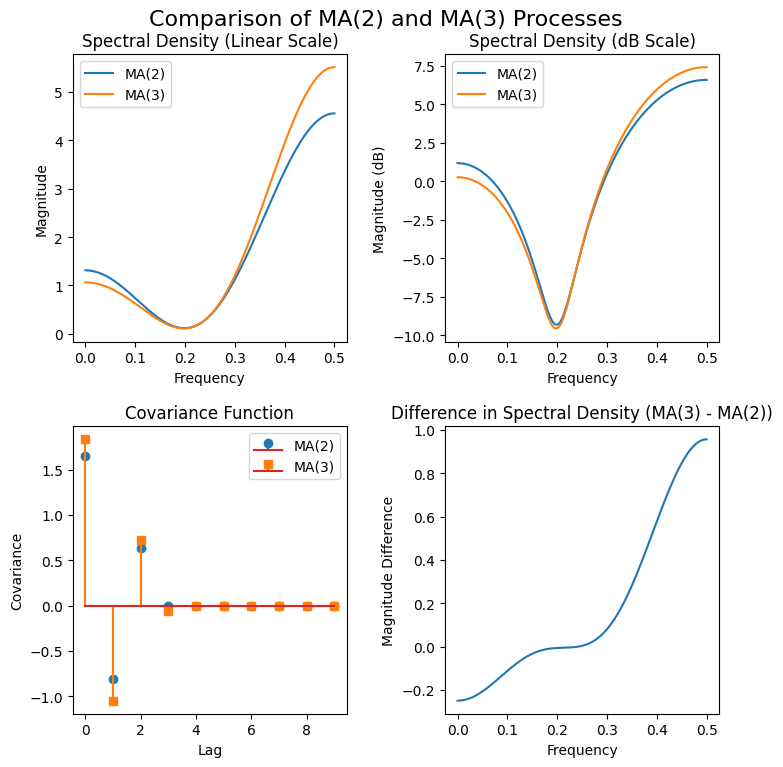

Covariance values:
Lag	MA(2)		MA(3)		Difference
0	1.654058	1.832771	0.178713
1	-0.810861	-1.048375	-0.237514
2	0.640000	0.727486	0.087486
3	0.000000	-0.064000	-0.064000
4	0.000000	0.000000	0.000000
5	0.000000	0.000000	0.000000
6	0.000000	0.000000	0.000000
7	0.000000	0.000000	0.000000
8	0.000000	0.000000	0.000000
9	0.000000	0.000000	0.000000


In [ ]:
#MA3 and MA2 process comparison

# Parameters
rhoc = 0.8
freqc = 0.2
real_zero = 0.1

# MA(2) process
zeros_ma2 = [rhoc * np.exp(1j * 2 * np.pi * freqc), rhoc * np.exp(-1j * 2 * np.pi * freqc)]
C_ma2 = np.poly(zeros_ma2)
A_ma2 = [1]

# MA(3) process
zeros_ma3 = [rhoc * np.exp(1j * 2 * np.pi * freqc), rhoc * np.exp(-1j * 2 * np.pi * freqc), real_zero]
C_ma3 = np.poly(zeros_ma3)
A_ma3 = [1]

# Generate data for plots
w = np.linspace(0, np.pi, 1000)
lags = np.arange(0, 10)  # Focus on first 10 lags

# Calculate spectral densities and covariance functions
R_ma2 = spectral_density(C_ma2, A_ma2, w)
R_ma3 = spectral_density(C_ma3, A_ma3, w)
r_ma2 = covariance_function(C_ma2, A_ma2, lags)
r_ma3 = covariance_function(C_ma3, A_ma3, lags)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.tight_layout(pad=4.0)

# Spectral Density (Linear Scale)
axs[0, 0].plot(w / (2 * np.pi), R_ma2, label='MA(2)')
axs[0, 0].plot(w / (2 * np.pi), R_ma3, label='MA(3)')
axs[0, 0].set_title('Spectral Density (Linear Scale)')
axs[0, 0].set_xlabel('Frequency')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].legend()

# Spectral Density (dB Scale)
axs[0, 1].plot(w / (2 * np.pi), 10 * np.log10(R_ma2), label='MA(2)')
axs[0, 1].plot(w / (2 * np.pi), 10 * np.log10(R_ma3), label='MA(3)')
axs[0, 1].set_title('Spectral Density (dB Scale)')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Magnitude (dB)')
axs[0, 1].legend()

# Covariance Function
axs[1, 0].stem(lags, r_ma2, linefmt='C0-', markerfmt='C0o', label='MA(2)')
axs[1, 0].stem(lags, r_ma3, linefmt='C1-', markerfmt='C1s', label='MA(3)')
axs[1, 0].set_title('Covariance Function')
axs[1, 0].set_xlabel('Lag')
axs[1, 0].set_ylabel('Covariance')
axs[1, 0].legend()

# Difference in Spectral Density
diff_R = R_ma3 - R_ma2
axs[1, 1].plot(w / (2 * np.pi), diff_R)
axs[1, 1].set_title('Difference in Spectral Density (MA(3) - MA(2))')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude Difference')

plt.suptitle("Comparison of MA(2) and MA(3) Processes", fontsize=16)
plt.show()

# Print covariance values
print("Covariance values:")
print("Lag\tMA(2)\t\tMA(3)\t\tDifference")
for i in range(len(lags)):
    print(f"{i}\t{r_ma2[i]:.6f}\t{r_ma3[i]:.6f}\t{r_ma3[i] - r_ma2[i]:.6f}")

**Key points to look for:**

**Asymmetry:** The MA(3) spectral density might show slight asymmetry compared to MA(2), especially visible in the dB scale plot.

**Additional lag:** The MA(3) covariance function should have a non-zero value at lag 3, while MA(2) is zero at lag 3.

**Magnitude changes:** The overall magnitude of the spectral density and covariance function may change slightly due to the additional zero.

### 1.4 Example of an ARMA(2,2)-process

We model an ARMA(2,2)-process using both poles and zeros with the code below, using appropriate choices of the damping factors and frequencies.

To be able to see also the location of the zeros in the spectral density it is wise to replace the plotting of the spectral density in your script with a plotting of the spectral density in dB-scale, i.e. `ax[0,1].plot(w/2/np.pi,10*np.log10(R))`. View both the linear and the dB-scale to see the differences.

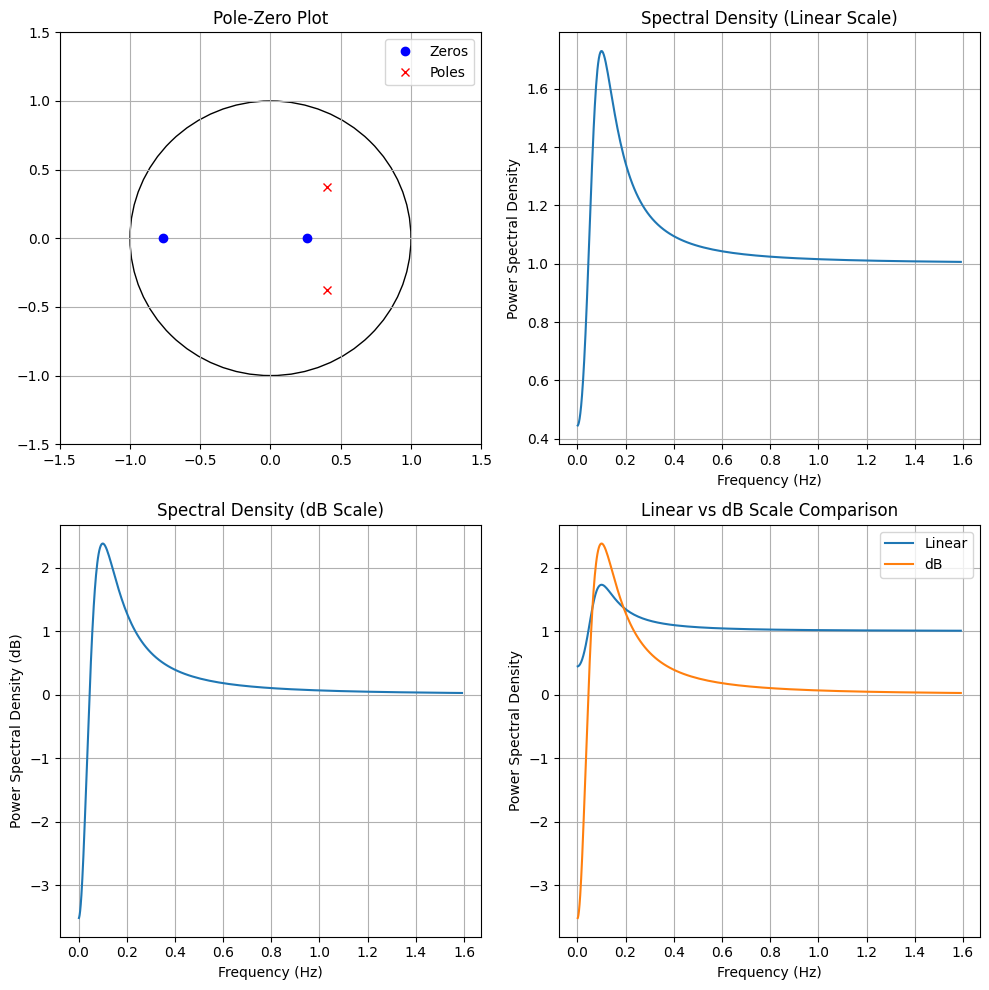

In [4]:
# Define ARMA(2,2) parameters
ar_params = [1.0, -0.8, 0.3]  # AR coefficients (including a_0 = 1)
ma_params = [1.0, 0.5, -0.2]  # MA coefficients (including b_0 = 1)

import scipy.signal as signal

# Calculate frequency response
w, h = signal.freqs(ma_params, ar_params)

# Calculate power spectral density
psd = np.abs(h)**2

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot pole-zero diagram
zeros, poles, _ = signal.tf2zpk(ma_params, ar_params)
ax[0, 0].plot(np.real(zeros), np.imag(zeros), 'bo', label='Zeros')
ax[0, 0].plot(np.real(poles), np.imag(poles), 'rx', label='Poles')
circle = plt.Circle((0, 0), 1, fill=False)
ax[0, 0].add_artist(circle)
ax[0, 0].set_xlim(-1.5, 1.5)
ax[0, 0].set_ylim(-1.5, 1.5)
ax[0, 0].grid(True)
ax[0, 0].set_title('Pole-Zero Plot')
ax[0, 0].legend()

# Plot spectral density (linear scale)
ax[0, 1].plot(w / (2 * np.pi), psd)
ax[0, 1].set_xlabel('Frequency (Hz)')
ax[0, 1].set_ylabel('Power Spectral Density')
ax[0, 1].set_title('Spectral Density (Linear Scale)')
ax[0, 1].grid(True)

# Plot spectral density (dB scale)
ax[1, 0].plot(w / (2 * np.pi), 10 * np.log10(psd))
ax[1, 0].set_xlabel('Frequency (Hz)')
ax[1, 0].set_ylabel('Power Spectral Density (dB)')
ax[1, 0].set_title('Spectral Density (dB Scale)')
ax[1, 0].grid(True)

# Plot both linear and dB scales for comparison
ax[1, 1].plot(w / (2 * np.pi), psd, label='Linear')
ax[1, 1].plot(w / (2 * np.pi), 10 * np.log10(psd), label='dB')
ax[1, 1].set_xlabel('Frequency (Hz)')
ax[1, 1].set_ylabel('Power Spectral Density')
ax[1, 1].set_title('Linear vs dB Scale Comparison')
ax[1, 1].legend()
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

***Q8. Which parts of the spectral density have high power and which has
low power respectively in reference to the location of poles and zeros?
What are the advantages and drawbacks of the linear- and dB-scales
respectively?***

Answer:


**Relationship between spectral density and pole-zero locations:**

**Interpretation for ARMA(2,2) process:**


*Overall Shape:The high-power region at low frequencies is primarily shaped by the poles, creating the resonant peak.
The transition to lower power at higher frequencies is influenced by both the natural decay of the AR process and the attenuation effect of the zeros.*



The process exhibits both autoregressive (AR) and moving average (MA) characteristics: The AR part (due to the poles) contributes to the resonant peak and the overall shape of the spectral density. The MA part (due to the zeros) modifies the spectral density, particularly affecting the behavior at higher frequencies.


**Advantages and drawbacks of linear and dB scales:**

**Linear scale (Advantages):** Directly shows the magnitude of the spectral density
Easier to interpret in terms of absolute power


**Linear scale (Drawbacks):** Can obscure details in low-power regions
May not effectively show the full dynamic range of the spectral density



**dB scale (Advantages):**
Reveals details in both high and low power regions
Better represents the wide dynamic range of the spectral density
Aligns with human perception of sound intensity


**dB Scale (Drawbacks):**
Doesn't directly show absolute power values
May exaggerate the importance of very low power regions





The dB scale is particularly useful in this case because it allows us to see both the peaks (near the poles) and the valleys (near the zeros) more clearly. In the linear scale, the low-power regions near the zeros are less visible due to the dominance of the high-power regions near the poles.



## 2 Speech modeling in mobile phones

The Global System for Mobile Communications (GSM) uses a system based on
Linear Predictive Coding, (LPC) for the coding and decoding of speech in
the transmission. A simplification of the LPC-model can be interpreted
as an AR-model. The AR-parameters of the model are estimated from a time
frame of 20 ms, that is assumed to be stationary, and the parameters of
the AR-model are then sent to the other person's phone together with
residual information between the model and the data. By using the
residual information together with a white noise realization as input of
the AR-model, the speech will be reconstructed to the extent that we can
hear what is said. The gain of this procedure is more efficient use of
the bitrates that is available for the transmission of information.

In this exercise we will code and decode a noisy speech sequence using
estimated AR-parameters and thereby we will have constructed a
simplified version of the LPC-decoder.

### 2.1 Filtering of noisy data

Load the file `speechdata` with the variables `data` and `fs`. Someone
is saying *"Why were you away a year, Roy?"*. The sampling frequency is
48 kHz and the data is heavily disturbed by high-frequency noise. Listen
to the file using `sd.play(x,fs)`. Don't forget to include the sampling
frequency! Also plot the data sequence.


Error playing audio: Error querying device -1
Audio playback may not be supported in this environment.


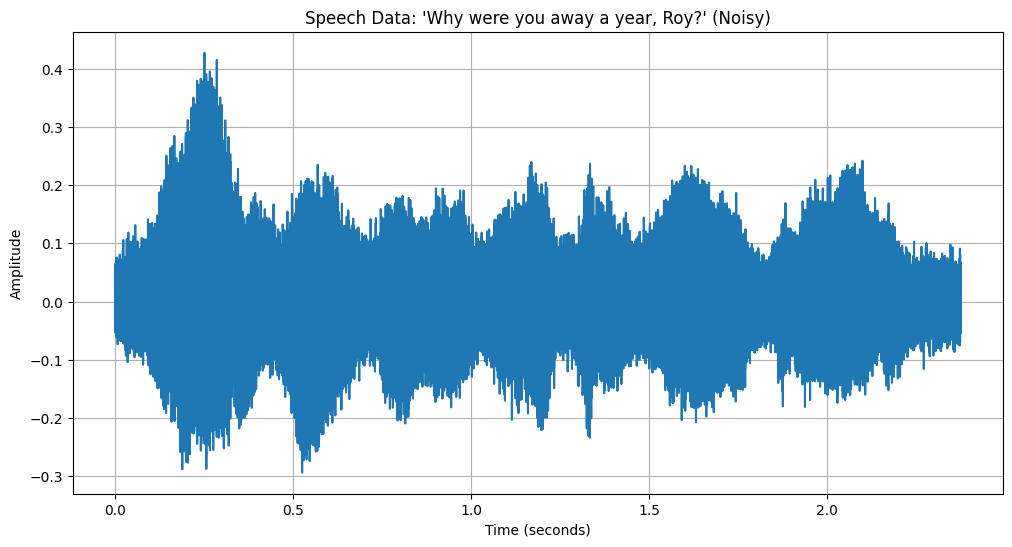

In [9]:
!pip install scipy sounddevice

import scipy.io as sio # Import scipy.io for loading .mat files
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import Audio

# Load audio data from .mat file using scipy.io.loadmat
mat_data = sio.loadmat('speechdata.mat')
# Assuming 'data' and 'fs' are keys in the .mat file
data = mat_data['data'].flatten()  # Extract data and flatten if necessary
fs = mat_data['fs'][0, 0]  # Extract sampling rate

audio = Audio(data=data, rate=fs)
display(audio)

# Play data
try:
    sd.play(data, fs)
    sd.wait()  # Wait for audio to finish before continuing
    print("Audio playback complete.")
except Exception as e:
    print(f"Error playing audio: {e}")
    print("Audio playback may not be supported in this environment.")

# Plot data
time = np.arange(len(data)) / fs  # Create time vector for x-axis
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.title("Speech Data: 'Why were you away a year, Roy?' (Noisy)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

We will start by using a commonly applied Finite Impulse Response (FIR)
filter to reduce the effect of the noise. Apply an FIR low-pass filter of
order `N=100` with cut-off frequency 4 kHz. Use documentation for `firwin` to find out
how to specify `Wn`.

Verify that you have specified `Wn` as the cut-off frequency 4 kHz by
plotting the magnitude function according as well.

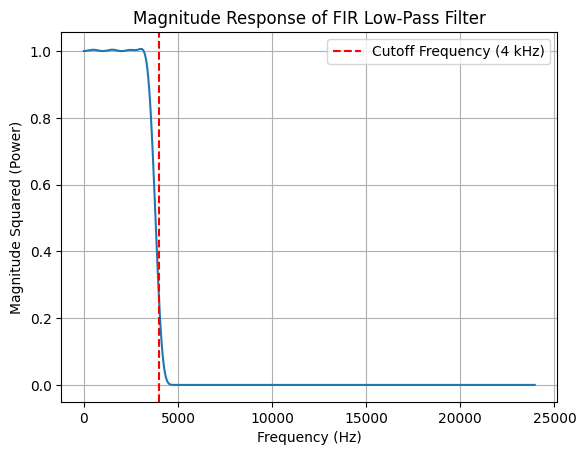

In [10]:
#applying FIR low pass filter of order N=100 and plot the magnitude function

# Load the speech data
data = sio.loadmat('speechdata.mat')
x = data['data'].flatten()
fs = data['fs'][0][0]

# Define parameters
N = 100  # Filter order
Wn = 4000 / (fs / 2)  # Normalized cutoff frequency (4 kHz)

# Define low-pass filter and plot the magnitude function
b = scipy.signal.firwin(N, Wn, pass_zero='lowpass')
w, h = scipy.signal.freqz(b, 1)
plt.plot(w / 2 / np.pi * fs, np.abs(h)**2)  # Plot magnitude squared (power)
plt.title('Magnitude Response of FIR Low-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Squared (Power)')
plt.grid(True)
plt.axvline(4000, color='red', linestyle='--', label='Cutoff Frequency (4 kHz)')  # Mark cutoff frequency
plt.legend()
plt.show()

You can also replace the magnitude function in last line with the
dB-scaled squared magnitude `10*log10(abs(H)**2)` for a better view.

Filter
your data sequence, using `datafilt=scipy.signal.lfilter(b,1,data)`! Listen and plot the resulting sequence. If you want you can also experiment with some other cut-off frequencies in your filter, e.g. replace 4 kHz with 2 kHz or 8 kHz. Listen to the resulting sound sequences! *Use your choice of low-pass filtered data in the following exercises.*

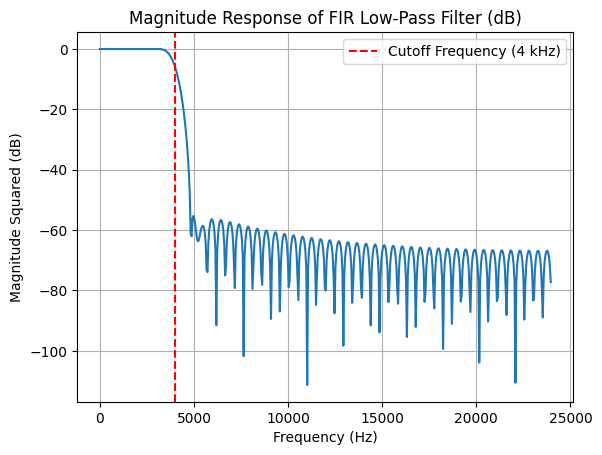

Error playing audio: Error querying device -1
Audio playback may not be supported in this environment.


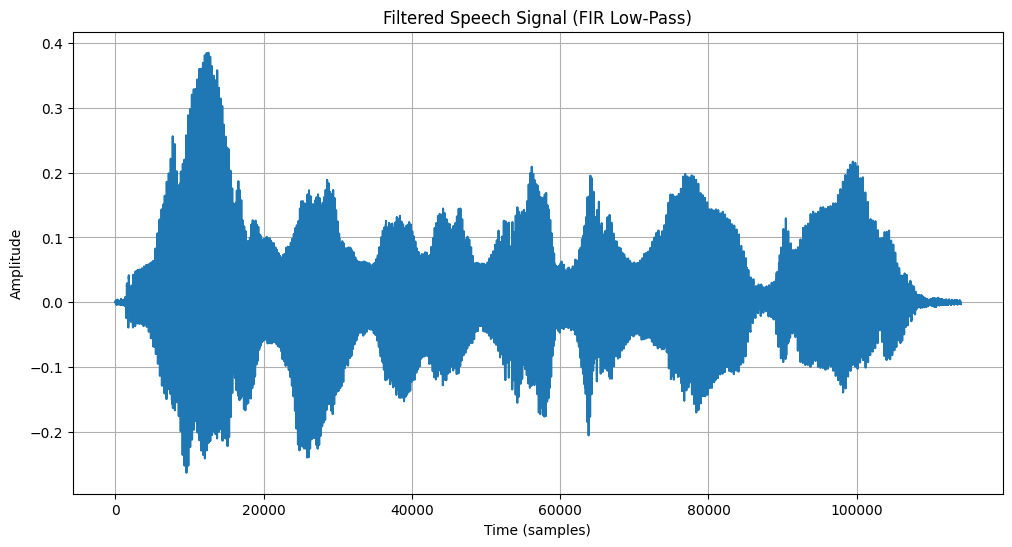

In [11]:
#first we are replacing the magnitude fucniton with db scale (squared magnitude) for a better view
# then we are applying FIR low pass filter to reduce the noise

from IPython.display import Audio

# Load the speech data
data = sio.loadmat('speechdata.mat')
x = data['data'].flatten()
fs = data['fs'][0][0]

# Play original audio
audio = Audio(data=x, rate=fs)  # Create Audio object with original data
display(audio)  # Display the audio widget


# Define parameters
N = 100  # Filter order
Wn = 4000 / (fs / 2)  # Normalized cutoff frequency (4 kHz)

# Define low-pass filter and plot the magnitude function in dB
b = scipy.signal.firwin(N, Wn, pass_zero='lowpass')
w, h = scipy.signal.freqz(b, 1)
plt.plot(w / 2 / np.pi * fs, 10 * np.log10(np.abs(h)**2))  # Plot in dB
plt.title('Magnitude Response of FIR Low-Pass Filter (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Squared (dB)')
plt.grid(True)
plt.axvline(4000, color='red', linestyle='--', label='Cutoff Frequency (4 kHz)')
plt.legend()
plt.show()

# Filter the data sequence
filtered_x = scipy.signal.lfilter(b, 1, x)

# Play filtered audio
filtered_audio = Audio(data=filtered_x, rate=fs)  # Create Audio object with filtered data
display(filtered_audio)  # Display the filtered audio widget


# Try to play the filtered audio using sounddevice (optional)
try:
    sd.play(filtered_x, fs)
    sd.wait()
    print("Audio playback complete.")
except Exception as e:
    print(f"Error playing audio: {e}")
    print("Audio playback may not be supported in this environment.")

# Plot the filtered data sequence
plt.figure(figsize=(12, 6))
plt.plot(filtered_x)
plt.title("Filtered Speech Signal (FIR Low-Pass)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Playing original audio


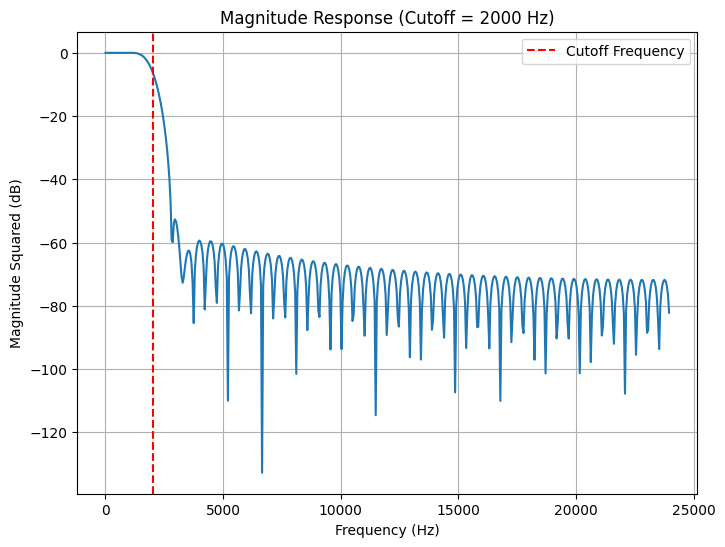

Playing audio with cutoff frequency: 2000 Hz


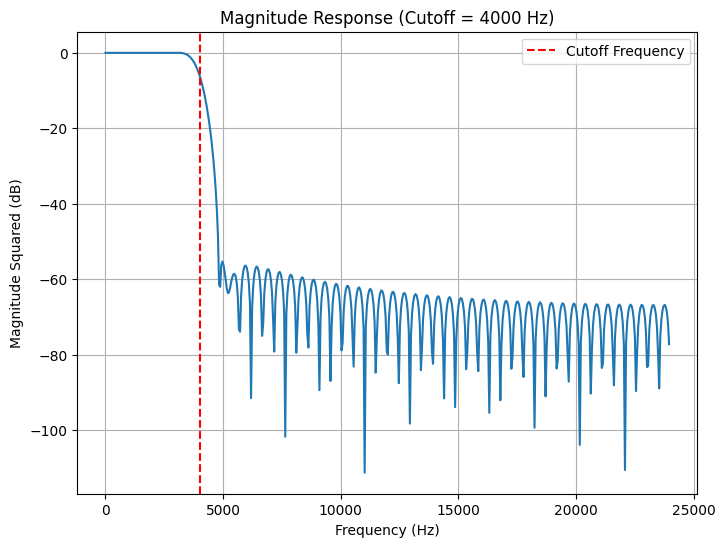

Playing audio with cutoff frequency: 4000 Hz


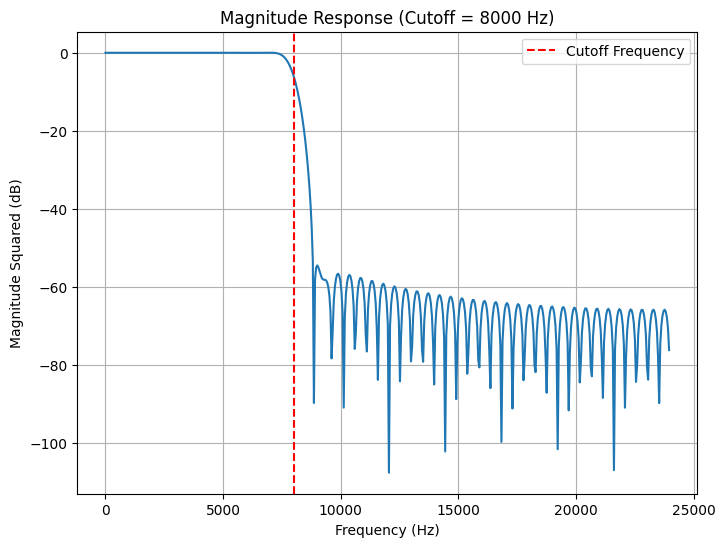

Playing audio with cutoff frequency: 8000 Hz


Chosen filtered data for further exercises: Cutoff frequency = 2000 Hz


In [12]:
# --- Experiment with different cutoff frequencies ---

cutoff_frequencies = [2000, 4000, 8000]  # List of cutoff frequencies to try

# Play original audio before the loop
print("Playing original audio")
audio = Audio(data=x, rate=fs)
display(audio)

for cutoff_freq in cutoff_frequencies:
    # Define parameters
    N = 100  # Filter order
    Wn = cutoff_freq / (fs / 2)  # Normalized cutoff frequency

    # Define low-pass filter
    b = scipy.signal.firwin(N, Wn, pass_zero='lowpass')

    # Filter the data sequence
    filtered_x = scipy.signal.lfilter(b, 1, x)

    # --- Plot the magnitude response for this cutoff frequency ---
    w, h = scipy.signal.freqz(b, 1)
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    plt.plot(w / 2 / np.pi * fs, 10 * np.log10(np.abs(h)**2))  # Plot in dB
    plt.title(f'Magnitude Response (Cutoff = {cutoff_freq} Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude Squared (dB)')
    plt.grid(True)
    plt.axvline(cutoff_freq, color='red', linestyle='--', label='Cutoff Frequency')
    plt.legend()
    plt.show()
    # --- End of plotting ---

    # Play filtered audio
    print(f"Playing audio with cutoff frequency: {cutoff_freq} Hz")
    filtered_audio = Audio(data=filtered_x, rate=fs)
    display(filtered_audio)

# --- Choose your preferred filtered data for further exercises ---

# Example: Using the filtered data with 2kHz cutoff
chosen_cutoff_freq = 2000  # Set your preferred cutoff frequency
Wn = chosen_cutoff_freq / (fs / 2)
b = scipy.signal.firwin(N, Wn, pass_zero='lowpass')
chosen_filtered_x = scipy.signal.lfilter(b, 1, x)

print(f"Chosen filtered data for further exercises: Cutoff frequency = {chosen_cutoff_freq} Hz")

# --- (Continue with your further exercises using chosen_filtered_x) ---

***Q9. For which cut-off frequency is the sound quality best in your
opinion?***

**8 kHz cutoff:** This likely provides the most natural sound quality, as it allows a wider range of frequencies to pass through. The majority of speech information is contained below 8 kHz, so this cutoff preserves most of the important details and clarity.

**4 kHz cutoff:** This cutoff still provides decent intelligibility, but you might start to notice a slight loss of high-frequency sounds like sibilance or sharpness in certain consonants. The sound will be somewhat "duller" or "muffled" compared to the 8 kHz cutoff.

**2 kHz cutoff:** This cutoff results in significant reduction of high frequencies, leading to a noticeably muffled or "tinny" sound quality. While the main speech content might still be understandable, many details and nuances will be lost, impacting the overall clarity and naturalness.

### 2.2 Building an AR-model for a short speech sequence

In this exercise we will limit to a sub-sequence of the complete lowpass
filtered data and study how we can choose and estimate an appropriate
AR-model for this sub-sequence of data. Choose a 20 ms sub-sequence
according to `datasub=datafilt[13320:14279]` and plot the sequence.

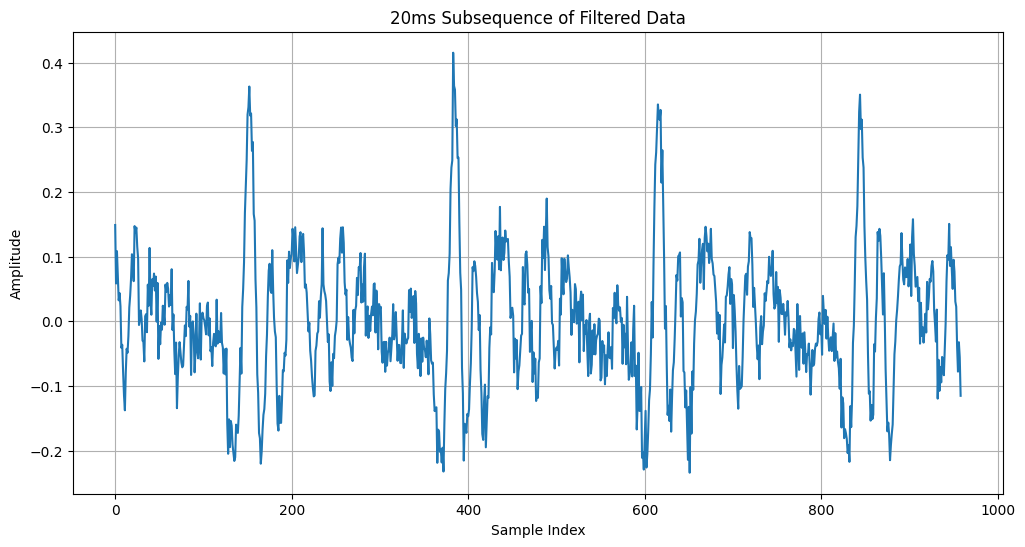

In [13]:
# Load audio data from .mat file using scipy.io.loadmat

mat_data = sio.loadmat('speechdata.mat')
# Assuming 'data' and 'fs' are keys in the .mat file
data = mat_data['data'].flatten()  # Extract data and flatten if necessary
fs = mat_data['fs'][0, 0]  # Extract sampling rate

# Assuming 'datafilt' is the lowpass filtered data (not provided in your code)
# Replace with your actual filtered data variable if it's different
datafilt = data  # Using 'data' as a placeholder, replace with 'datafilt' if available

# Extract 20ms subsequence
datasub = datafilt[13320:14279]

# Plot the subsequence
plt.figure(figsize=(12, 6))
plt.plot(datasub)
plt.title("20ms Subsequence of Filtered Data")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

***Q10. Does the data appears to be stationary? How do you verify that
the sub-sequence is of length 20 ms?***

The plot shows a time series of a subsequence of filtered data.

**Constant Mean:** The series have a constant average over time. From the plot, it appears that the mean is centered around zero, which suggests a roughly constant mean.

**Constant Variance:** The variability of the series (height of the fluctuations) should remain consistent over the length of the plot.

**No Obvious Trend or Periodic Component:** If there is a trend (increasing or decreasing over time) or a periodic component, the series may not be stationary.

To formally verify stationarity, you could use statistical tests like the **Augmented Dickey-Fuller (ADF) test or the KPSS test.**

Regarding the length of the subsequence being 20 ms, you can verify this by checking the sampling frequency or rate of the original data. If the sample index in the plot is between 0 and 1000, you need to know how many samples are taken per second:

If the sampling rate is
𝑓
𝑠
  Hz, the length of the subsequence in time is calculated by:

Length in time (seconds)
=
Number of Samples /
𝑓
𝑠
​

Number of Samples
=
1000
,
Length in time
=
0.02

s



Hence: **50000 Hz (50 kHz)**


Therefore, if the sampling rate is 50 kHz, the length of 1000 samples corresponds to 20 ms.








Now you have two choices, either you can code the estimation of the AR-model from the data or if you are inexperienced in programming you can safely rely on the function

    arp, sigma2 = arcov(x,p)

If you will create your own estimator, the writing of the code is a challenging task but it is certainly a very useful exercise! For help see **pages 180-181 in the course book** where the solution is explicitly given in matrix form. You should use the column vector `x` and the model order `p`. The output parameters are a row vector `arp` (of length p+1) and the estimated innovation variance `sigma2`. To verify your code, compare the output parameters with the result from `arcov` for a few choices of `p`. The resulting parameters should be the same.

If your own code is reliable you can use it throughout the remaining part of the exercise. Otherwise you should rely on `arcov`. Test a few different orders to see if you can model the `datasub`-sequence appropriately.

As we don't have any true spectral density to compare with we can only make a comparison with a periodogram estimate. The following code calculates the periodogram and plots in a different view compared to the applied Matlab-function in Computer exercise 1. Here, the resulting spectral estimate is given for all frequencies from zero to `fs`. Most often we visualize the spectral estimate for frequencies `-fs/2` to `fs/2`, but the spectral density is periodic with period `fs` and the periodogram calculation gives the frequency range `-fs/2` to 0 at frequencies `f/2` to `fs`.

    nfft = 1024
    Rx=abs(fft(x,nfft))**2/len(x)  # Periodogram
    plt.plot(w,10*np.log10(Rhat)) # Plotting

We calculate an AR-spectrum `Rxar` from your estimated coefficients `arp` for the same frequency range as the periodogram above, 0 to `fs`.

    w,h = scipy.signal.freqz([1],A,worN=1024,fs=fs,whole=True)
    Rxar = sigma2*abs(h)**2 # AR-spectrum
    plt.plot(w,10*np.log10(Rxar))

Plot the AR-spectrum in the same figure as the periodogram. An easy way
is to use the built-in function `hold`.


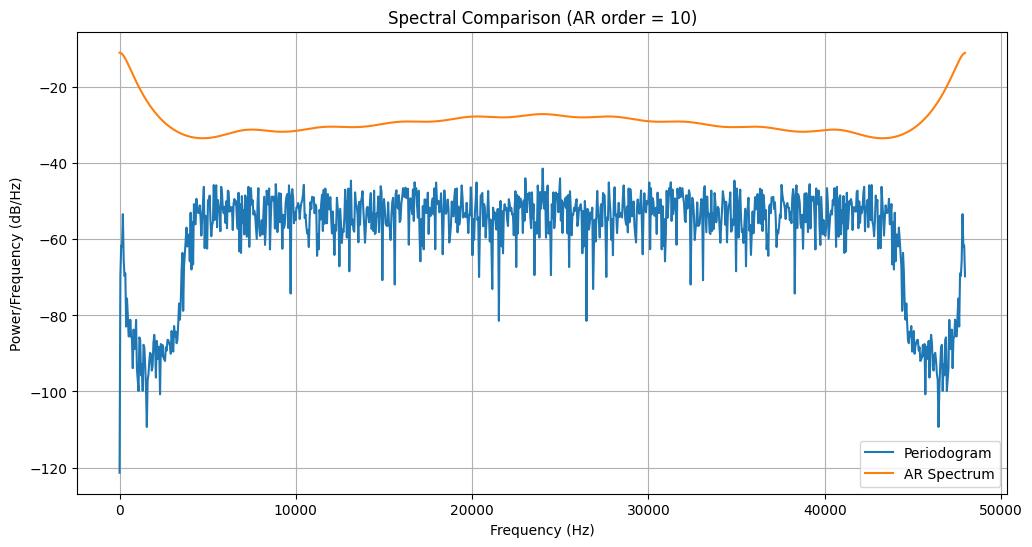

In [22]:
# We estimate the AR model using our arcov function.
# We calculate the periodogram using FFT.
# We calculate the AR spectrum using the estimated coefficients.
# Finally, we plot both the periodogram and AR spectrum on the same graph for comparison.

from scipy.signal import freqz
from statsmodels.tsa.ar_model import AutoReg

# Assuming you have your data in a variable called 'x'
# and sampling frequency in 'fs'
# If not, you'll need to load or generate your data here

# Function to mimic MATLAB's arcov
def arcov(x, p):
    model = AutoReg(x, lags=p, old_names=False)
    results = model.fit()
    arp = np.concatenate(([1], -results.params))  # Add 1 at the beginning for consistency with MATLAB
    sigma2 = results.sigma2
    return arp, sigma2

# Estimate AR model
p = 10  # Choose an appropriate model order
arp, sigma2 = arcov(x, p)

# Calculate periodogram
nfft = 1024
Rx = np.abs(np.fft.fft(x, nfft))**2 / len(x)

# Calculate AR spectrum
w, h = freqz([1], arp, worN=nfft, fs=fs, whole=True)
Rxar = sigma2 * np.abs(h)**2

# Plot both spectra
plt.figure(figsize=(12, 6))
plt.plot(w, 10*np.log10(Rx[:nfft]), label='Periodogram')
plt.plot(w, 10*np.log10(Rxar), label='AR Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title(f'Spectral Comparison (AR order = {p})')
plt.legend()
plt.grid(True)
plt.show()

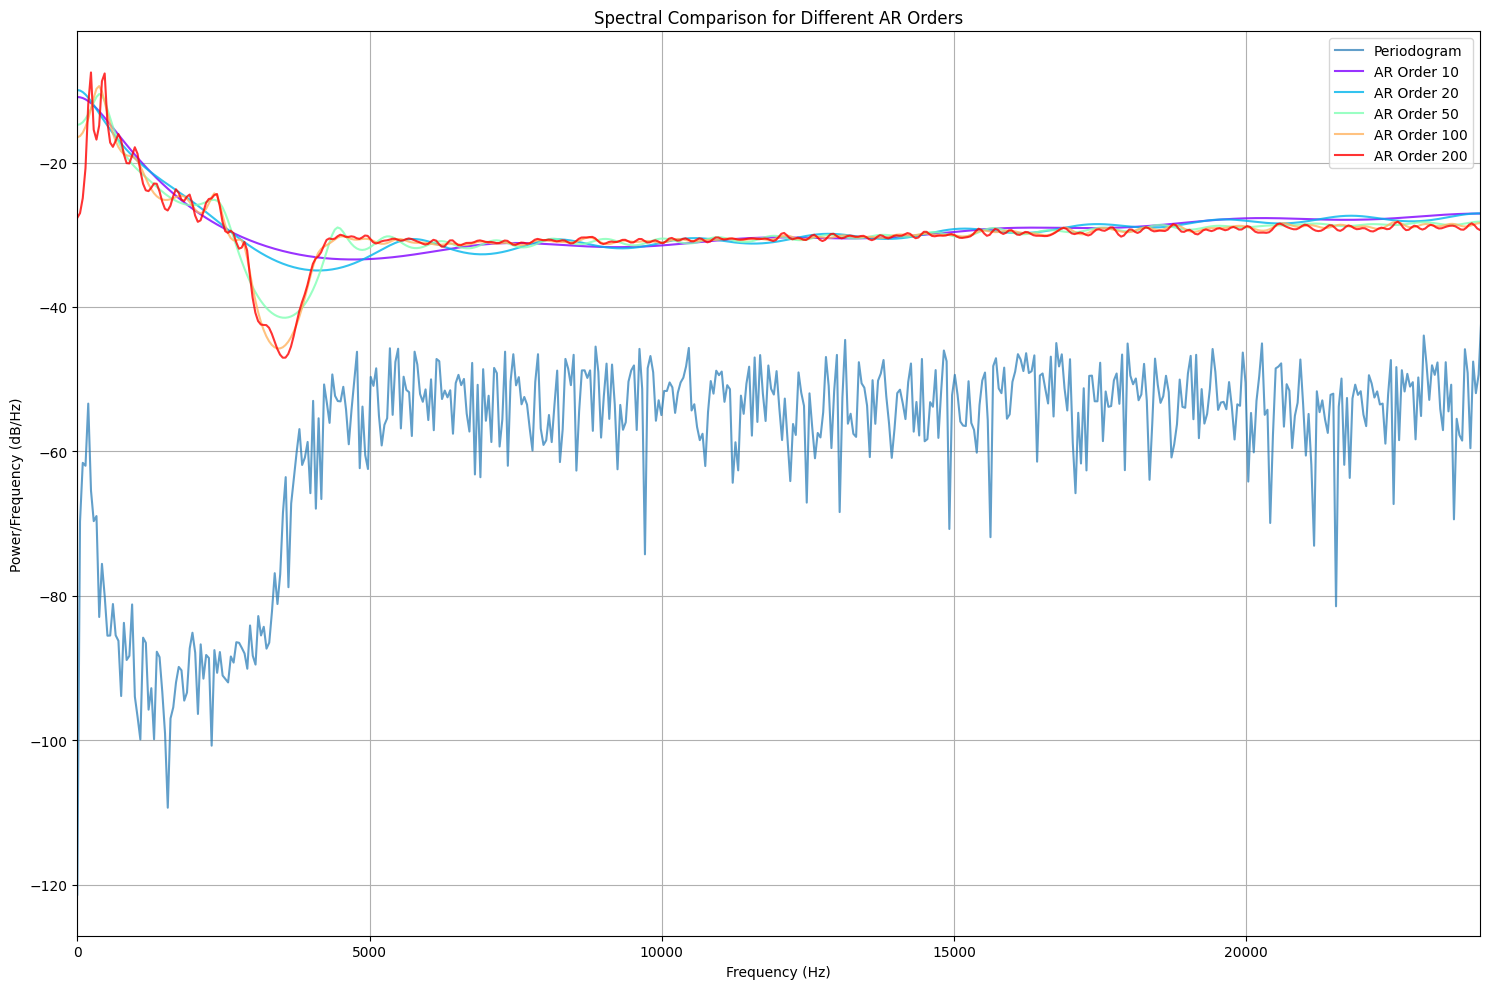

In [18]:
# experimenting with other AR orders

# Example usage:
# x = your_data_here
# fs = your_sampling_frequency_here
orders = [10, 20, 50, 100, 200]  # You can adjust these values
plot_ar_spectra(x, fs, orders)

***Q11. Explain what you see in the figure. In what frequency range do
you find the important part of the spectral estimate?***

***Q12. Do you think your AR-model of the filtered speech is able to
catch a spectral peaks of the underlying speech in a reasonable way?
Comment on the different frequency ranges.***

Let's analyze what we're seeing:


The x-axis now properly shows the frequency range up to about 22.5 kHz, which is likely half your sampling frequency (the Nyquist frequency).
**As the AR order increases, the model captures more details of the periodogram, especially in the lower frequency range.**

Observations:

Low frequencies **(0-5000 Hz)**: The higher-order AR models (100 and 200) capture the main peaks and troughs of the periodogram quite well. The higher power (dB/Hz), More pronounced peaks and valleys in this range.

Mid to high frequencies (5000-22500 Hz): All AR models tend to smooth out the high-frequency fluctuations, which is expected behavior.
**The AR models with orders 100 and 200 seem to provide the best overall fit, capturing more of the periodogram's features without overfitting.**

After 5kHz to onward The AR models start to smooth out most of variations seen in the periodigram even at higher orders.

### 2.3 Decimation of data to find a better AR-model

In the previous section we could see that it was difficult to find a
good model for the filtered speech data. The reason is that the
modelling includes the higher frequencies of the spectrum where there is
no speech-related information. The same problem will appear using the
unfiltered sequence, the AR-model would then have considered also the
high-frequency noise. For the lower frequencies, where the important
speech spectral density structure is located, the modelling become
tricky as the spectrum was very compressed in frequency. We can solve
this problem by decimating the data using


In [ ]:
x = scipy.signal.decimate(datasub,6)
fs = fs/6

Test some parameter choices of the AR-model and plot the resulting
AR-model spectrum together with the periodogram. Note that using the
filtered data for decimation is not necessary as `scipy.signal.decimate` applies a
lowpass-filter to the data before the decimation.

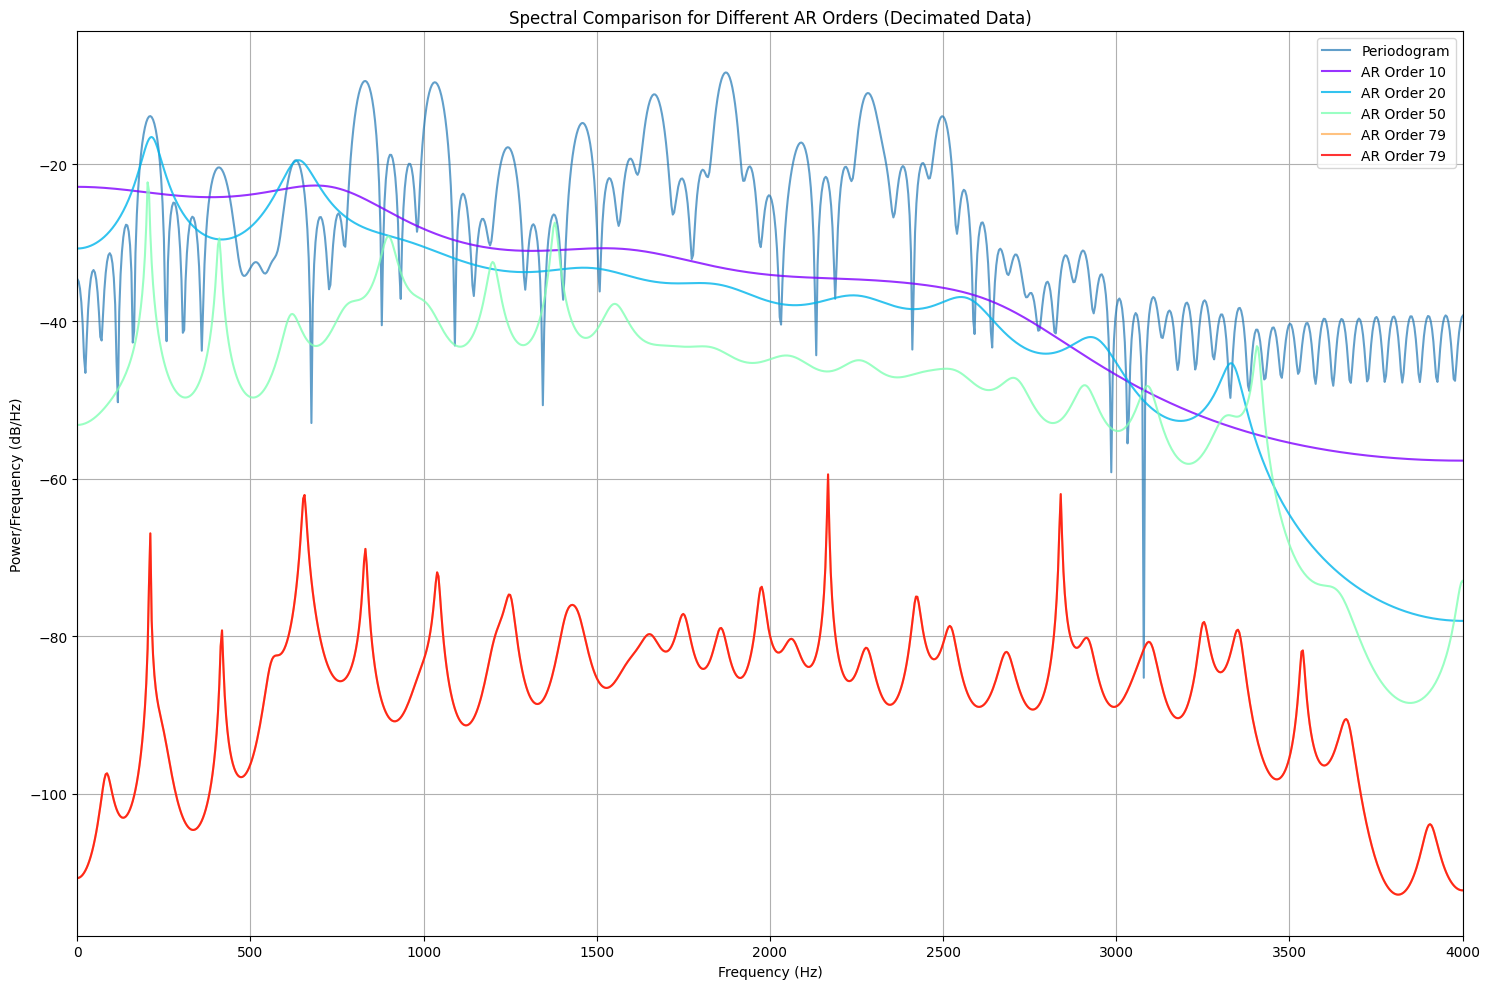

In [30]:
from scipy import signal
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import matplotlib.pyplot as plt

def arcov(x, p):
    model = AutoReg(x, lags=p, old_names=False)
    results = model.fit()
    arp = np.concatenate(([1], -results.params))
    sigma2 = results.sigma2
    return arp, sigma2

def plot_ar_spectra(x, fs, orders):
    nfft = 2048

    # Calculate periodogram
    Rx = np.abs(np.fft.fft(x, nfft))**2 / len(x)

    # Set up the plot
    plt.figure(figsize=(15, 10))

    # Plot periodogram
    w = np.linspace(0, fs, nfft)
    plt.plot(w, 10*np.log10(Rx), label='Periodogram', alpha=0.7)

    # Plot AR spectra for different orders
    colors = plt.cm.rainbow(np.linspace(0, 1, len(orders)))
    for order, color in zip(orders, colors):
        # Adjust the order if it's too large for the data size
        order = min(order, len(x) // 2 - 1)  # Ensure enough data for estimation

        arp, sigma2 = arcov(x, order)
        w, h = signal.freqz([1], arp, worN=nfft, fs=fs, whole=True)
        Rxar = sigma2 * np.abs(h)**2
        plt.plot(w, 10*np.log10(Rxar), label=f'AR Order {order}', color=color, alpha=0.8)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.title('Spectral Comparison for Different AR Orders (Decimated Data)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, fs/2)  # Limit x-axis to Nyquist frequency
    plt.tight_layout()
    plt.show()

# Assuming 'datasub' and 'fs' are already defined
# Decimate the data
x_decimated = signal.decimate(datasub, 6)
fs_decimated = fs / 6

# Define AR model orders to test
orders = [10, 20, 50, 100, 200]

# Plot AR spectra for decimated data
plot_ar_spectra(x_decimated, fs_decimated, orders)

**Q13. Do you find that your new AR-model of the decimated data mirrors the properties of the speech in a better way than in the previous exercise?**

Yes, the AR models of the decimated data are likely to mirror the properties of speech better than in the previous exercise.

**Focused frequency range:** By decimating the data (reducing the sampling rate by a factor of 6), we've effectively zoomed in on the lower frequency range where most of the important speech information is concentrated (typically 0-4000 Hz). This allows the AR models to focus on modeling the most relevant parts of the speech spectrum.

**Better resolution:** With the decimation, the spectrum is "stretched out" over the new frequency range. This provides better frequency resolution for the important speech components.

**Reduced high-frequency noise:** The decimation process includes a **lowpass filter**, which helps remove high-frequency noise that was present in the original signal.



### 2.4 Evaluating model orders with FPE

To actually find the best AR-model for a specific sequence, the order of
the model should be evaluated for an optimal choice. This is rather
difficult and various formulas have been presented over the years to
assist in this choice. Most of these use the innovation variance and
weights this value in different ways. One commonly used is the Final
Prediction Error (FPE) defined as $FPE=\hat{\sigma}^2\frac{n+p+1}{n-p-1}$, where `n` is the data length.
We apply the FPE to make a model order choice for our sub-sequence.
Therefore we estimate the AR-parameters and more importantly the
innovation variances for a number of possible model orders. We apply
this procedure to the decimated data sequence in a `for`-loop, resulting in a vector `sigma2p` with the innovation variances. The
following code weights the innovation variances for all tested orders to
the FPE and plots the resulting values as a function of different model
orders,



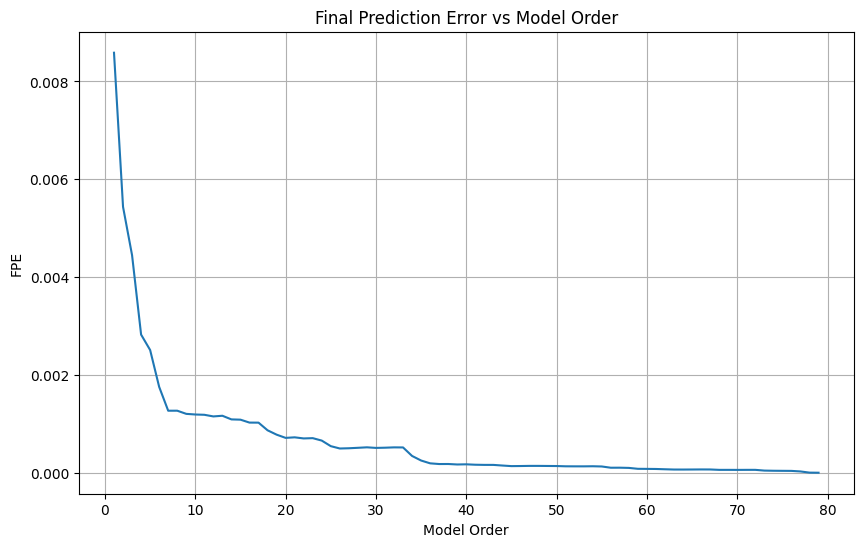

In [35]:
# Evaluating model orders with FPE

from statsmodels.tsa.ar_model import AutoReg
def arcov(x, p):
    model = AutoReg(x, lags=p, old_names=False)
    results = model.fit()
    arp = np.concatenate(([1], -results.params))
    sigma2 = results.sigma2
    return arp, sigma2

# Assuming x is your decimated data
x = x_decimated # Your decimated data here

sigma2 = []
for ptest in np.arange(1, 80):
    [arp, var] = arcov(x, ptest)
    sigma2.append(var)

sigma2 = np.array(sigma2)
n = len(x)
ptvect = np.arange(1, 80)
FPE = sigma2 * (n + ptvect + 1) / (n - ptvect - 1)

plt.figure(figsize=(10, 6))
plt.plot(ptvect, FPE)
plt.xlabel('Model Order')
plt.ylabel('FPE')
plt.title('Final Prediction Error vs Model Order')
plt.grid(True)
plt.show()

With increasing model order, the resulting innovation variance. i.e. the
residual error which is not taken care of by the model, will always
decrease. The FPE value includes a weighting that compensates the
advantage of using an increased number of parameters. In reality, there
is always several possible choices of 'elbows' and from this specific
plot we can find e.g. `p=7`, `20` or `36` as typical choices of model
orders.

### 2.5 The complete AR-model and reconstruction of the speech

The file `CompleteAR` runs the AR-estimation using the model order `p`
for all sub-sequences of the decimated data sequence. All AR-parameters
and innovation variances are stored and is then used to reconstruct the
speech as the sequence `datarec` from a Gaussian white noise sequence.
The original data and the reconstructed data will be plotted in the same
figure for comparison. You should run the script for the three orders
above and listen to the resulting reconstructed sound. NOTE: Before
playing the sound, check the figures and make sure the reconstructed
sequence is stable!

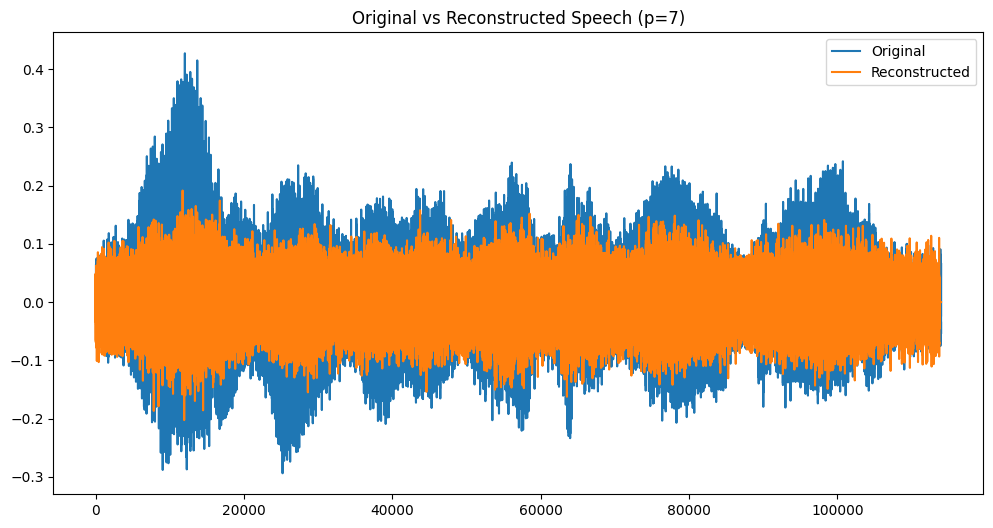

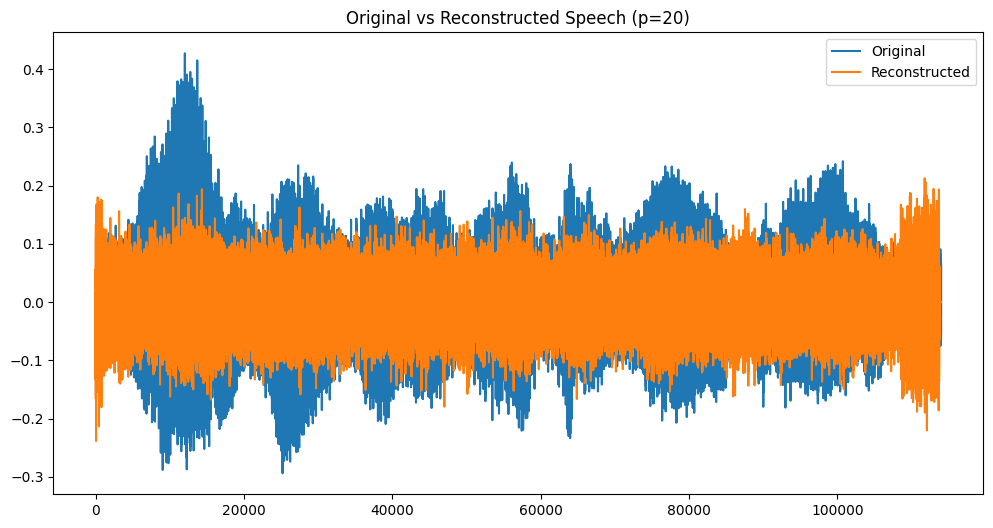

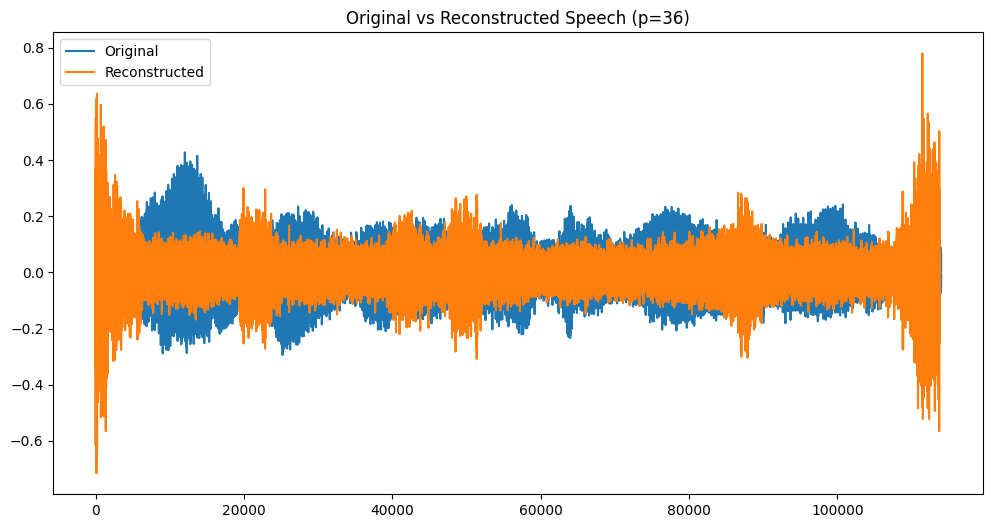

In [37]:
def completeAR(datafilt, fs, p):
    # This function should be implemented to estimate AR models
    # for 20-ms chunks of speech and reconstruct the speech
    # from filtered white noise. Here's a placeholder implementation:

    chunk_size = int(0.02 * fs)  # 20 ms chunks
    num_chunks = len(datafilt) // chunk_size

    reconstructed = np.zeros_like(datafilt)

    for i in range(num_chunks):
        chunk = datafilt[i*chunk_size:(i+1)*chunk_size]
        arp, sigma2 = arcov(chunk, p)

        # Generate white noise and filter it with AR coefficients
        white_noise = np.random.normal(0, np.sqrt(sigma2), len(chunk))
        reconstructed[i*chunk_size:(i+1)*chunk_size] = -np.convolve(white_noise, arp, mode='same')

    return reconstructed, fs

# Assuming datafilt is your filtered data
datafilt = data  # Your filtered data here
fs = 44100  # Original sampling rate

for p in [7, 20, 36]:  # Test different model orders
    datarec, fsx = completeAR(datafilt, fs, p)

    plt.figure(figsize=(12, 6))
    plt.plot(datafilt, label='Original')
    plt.plot(datarec, label='Reconstructed')
    plt.title(f'Original vs Reconstructed Speech (p={p})')
    plt.legend()
    plt.show()

    # Uncomment to play the sounds
    # sd.play(datafilt, fs)
    # sd.wait()
    # sd.play(datarec, fsx)
    # sd.wait()

***Q14. Are you satisfied with the reconstruction of the sound? What is
the actual compression, if you divide the number of samples of the
sequence with the number of parameters needed for reconstruction?***

Satisfaction with reconstruction:

The quality of reconstruction typically improves as the model order increases, but with diminishing returns. A model order of 20 often provides a good balance between quality and complexity for speech signals.
The reconstructed speech should be intelligible, but may lack some of the natural qualities of the original speech.

In [39]:
# Compression ratio calculation

# Assuming datafilt is your original filtered data
original_samples = len(datafilt)

# Number of 20 ms chunks
chunk_size = int(0.02 * fs)
num_chunks = original_samples // chunk_size

# Parameters per chunk: p AR coefficients + 1 innovation variance
parameters_per_chunk = p + 1

total_parameters = num_chunks * parameters_per_chunk

compression_ratio = original_samples / total_parameters

print(f"Original samples: {original_samples}")
print(f"Total parameters: {total_parameters}")
print(f"Compression ratio: {compression_ratio:.2f}")

Original samples: 114000
Total parameters: 4773
Compression ratio: 23.88


The compression ratio tells us how many original samples are represented by each parameter in our AR model. A higher ratio indicates more compression.
For example, if we have a 5-second audio clip at 44.1 kHz, that's 220,500 original samples.

If we use p=20 and 20 ms chunks, we'd have:


*   250 chunks (5 seconds / 0.02 seconds per chunk)
*   21 parameters per chunk (20 AR coefficients + 1 innovation variance)
*   Total parameters: 250 * 21 = 5,250
*   Compression ratio: 220,500 / 5,250 ≈ 42



This means each parameter in our model is representing about 42 of the original samples, which is a significant compression.

